# Getting Spotify playlist data for OPM Rock


In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import getpass
import time
import os
import ast

from tqdm import tqdm

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "drive/MyDrive/Eskwelabs_C12/Sprint3/"
os.chdir(home_dir)

In [ ]:
# Make data/playlist/ directory
os.makedirs('data/playlists', exist_ok=True)

## 1. Setup Spotipy credentials and query wrapper

In [ ]:
client_id = getpass.getpass(prompt='Enter Spotify app client id: ')

Enter Spotify app client id: ··········


In [ ]:
client_secret = getpass.getpass(prompt='Enter Spotify app client secret: ')

Enter Spotify app client secret: ··········


In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,
                                                      client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## 2. Choose playlist keyword and navigate search top results

In [ ]:
# Keyword to use for playlist- target genre
KEYWORD = 'opm rock'

`sp.search` provides basic info for an artist. Check out [search docs page](https://developer.spotify.com/documentation/web-api/reference/search) for details.

In [ ]:
results = sp.search(q=KEYWORD, type='playlist', market='PH')

In [ ]:
results

{'playlists': {'href': 'https://api.spotify.com/v1/search?query=opm+rock&type=playlist&market=PH&offset=0&limit=10',
  'items': [{'collaborative': False,
    'description': 'OPM Rock hits of the 90s to 2000s. Cover: Rico Blanco',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWYDQ8wBxd7xt'},
    'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWYDQ8wBxd7xt',
    'id': '37i9dQZF1DWYDQ8wBxd7xt',
    'images': [{'height': None,
      'url': 'https://i.scdn.co/image/ab67706f00000003e15af7b91f8466377c2bb236',
      'width': None}],
    'name': 'OPM Rock Hits',
    'owner': {'display_name': 'Spotify',
     'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
     'href': 'https://api.spotify.com/v1/users/spotify',
     'id': 'spotify',
     'type': 'user',
     'uri': 'spotify:user:spotify'},
    'primary_color': None,
    'public': None,
    'snapshot_id': 'MTY5Nzc5MzU4MiwwMDAwMDAwMDVmMzBhMjdiY2I1Njg3OTI3YzhmMDM5MDIwZmYzNjll',
    'tra

In [ ]:
# Helper function to print structure of a nested dict object with lists
def print_dict_structure(d, indent=0, upper_level_keys=0):
    for key, value in d.items():
        if isinstance(value, list):
            print("  " * indent + str(key) + ": List")
            if len(value) > 0:
                if isinstance(value[0], dict):
                    print_dict_structure(value[0], indent + 1)
                else:
                    print("  " * (indent+1) + "List Item")
        elif isinstance(value, dict):
            print("  " * indent + str(key) + ": Dict")
            print_dict_structure(value, indent + 1)
        else:
            print("  " * indent + str(key) + ": " + str(type(value).__name__))


In [ ]:
print_dict_structure(results)

playlists: Dict
  href: str
  items: List
    collaborative: bool
    description: str
    external_urls: Dict
      spotify: str
    href: str
    id: str
    images: List
      height: NoneType
      url: str
      width: NoneType
    name: str
    owner: Dict
      display_name: str
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    primary_color: NoneType
    public: NoneType
    snapshot_id: str
    tracks: Dict
      href: str
      total: int
    type: str
    uri: str
  limit: int
  next: str
  offset: int
  previous: NoneType
  total: int


In [ ]:
print_dict_structure(results['playlists']['items'][0])

collaborative: bool
description: str
external_urls: Dict
  spotify: str
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: NoneType
public: NoneType
snapshot_id: str
tracks: Dict
  href: str
  total: int
type: str
uri: str


Create list comprehension to iterate over playlist items and get playlist names

In [ ]:
[r['name'] for r in results['playlists']['items']]

['OPM Rock Hits', 'Kalye Hip-Hop', 'Tatak Pinoy', "OPM: Hits of the '00s"]

Now we create a loop to get playlists in the search results

In [ ]:
playlist_ids = []
playlist_names = []

N = 51
# Get playlist in batches of 50
for n in np.arange(N//50):
    offset= 50*n
    print("Getting batch %d of search results for keyword: %s ..." % (n,KEYWORD), end='' )
    results = sp.search(q=KEYWORD, type='playlist' , market='PH', offset = offset, limit=50)
    playlist_ids.extend([p['href'].split('/')[5] for p in results['playlists']['items']])
    playlist_names.extend([p['name'] for p in results['playlists']['items']])
    print("  DONE!")

Getting batch 0 of search results for keyword: opm rock ...  DONE!


## 3. Get Playlist Data

`sp.playlist` provides info for a playlist. Check out [playlist docs page](https://developer.spotify.com/documentation/web-api/reference/get-playlist) for details.

### 3.1 Check structure of `sp.playlist` output

In [ ]:
playlist_id = '37i9dQZF1DWYDQ8wBxd7xt'
playlist = sp.playlist(playlist_id)
playlist

{'collaborative': False,
 'description': 'OPM Rock hits of the 90s to 2000s. Cover: Rico Blanco',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWYDQ8wBxd7xt'},
 'followers': {'href': None, 'total': 809429},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWYDQ8wBxd7xt?additional_types=track',
 'id': '37i9dQZF1DWYDQ8wBxd7xt',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f00000003e15af7b91f8466377c2bb236',
   'width': None}],
 'name': 'OPM Rock Hits',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#ffffff',
 'public': False,
 'snapshot_id': 'MCxjN2UzMWQyMWI5OTFkMjk0MDJjZjRhZjA4ZTllN2Y3ZDAwMGNjMjA3',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWYDQ8wBxd7xt/tracks?offset=0&limit=100&additional_types=

In [ ]:
print_dict_structure(playlist)

collaborative: bool
description: str
external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: str
public: bool
snapshot_id: str
tracks: Dict
  href: str
  items: List
    added_at: str
    added_by: Dict
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    is_local: bool
    primary_color: NoneType
    track: Dict
      album: Dict
        album_type: str
        artists: List
          external_urls: Dict
            spotify: str
          href: str
          id: str
          name: str
          type: str
          uri: str
        available_markets: List
          List Item
        external_urls: Dict
          spotify: str
        href: str
        id: str
        images: List
       

In [ ]:
playlist['tracks']['total']

40

### 3.2. Get relevant data for each playlist

In [ ]:
# Helper function to get playlist data in dict format
def get_playlist_data(playlist_id):
    playlist_data = sp.playlist(playlist_id)

    relevant_playlist_data = {'playlist_id': playlist_id}
    relevant_playlist_data['playlist_name'] = playlist_data['name']
    relevant_playlist_data['playlist_total_tracks'] = playlist_data['tracks']['total']
    relevant_playlist_data['owner_id'] = playlist_data['owner']['id']
    relevant_playlist_data['owner_name'] = playlist_data['owner']['display_name']
    relevant_playlist_data['total_followers'] = playlist_data['followers']['total']

    return relevant_playlist_data

### 3.3. Loop to get data for all playlists in search results

In [ ]:
playlist_data_list = []
progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), desc='Fetching playlist data ')
for i, playlist_id in progress_bar:
    try:
        playlist_data = get_playlist_data(playlist_id)
        playlist_data_list.append(playlist_data)
        time.sleep(1)
    except Exception as e:
        # Print track id and error msg
        print(f'Error requesting data for playlist id {playlist_id}: {e}')
        continue

Fetching playlist data : 100%|██████████| 21/21 [00:27<00:00,  1.30s/it]


### 3.4. Join and save

In [ ]:
playlist_data_df = pd.DataFrame(playlist_data_list)
playlist_data_df = playlist_data_df.sort_values('total_followers',ascending=False)
playlist_data_df

playlist_id                  playlist_name  \
6   37i9dQZF1DXcZQSjptOQtk           Hot Hits Philippines   
12  37i9dQZF1DX12Zn55QZM3w                          Hugot   
2   37i9dQZF1DX0iFfuXuP4Pm                    Tatak Pinoy   
5   37i9dQZF1DX7Jerj8LqApV               OPM Says Chillax   
1   37i9dQZF1DXbvIwPsyNnKl                  Kalye Hip-Hop   
0   37i9dQZF1DWYDQ8wBxd7xt                  OPM Rock Hits   
7   37i9dQZF1DXcfJb5A3855D                 Pinoy Open Mic   
17  37i9dQZF1DWU8kzutEZgNK  Soundtrack of the Philippines   
15  37i9dQZF1DX0DrBh4sbMhw                   magmuni-muni   
3   37i9dQZF1DWT4GbvSrNWS6          OPM: Hits of the '00s   
8   37i9dQZF1DX0oESWhpVpaJ           Best of Manila Sound   
18  37i9dQZF1DX6oLdwrroY56                Pinoy Indie Mix   
20  37i9dQZF1DWYmgqK1iAdKl  ako nga pala yung sinayang mo   
10  37i9dQZF1DWZpPC3clG38j                   Pinoy Reggae   
4   37i9dQZF1DX53n2vsU9kOm          OPM: Hits of the '90s   
14  37i9dQZF1DWZKNkQDWII13                     Men of OPM   
11  37i9dQZF1DWXjlWxUbm84A        Top OPM Artists of 2018   
9   37i9dQZF1DX6i41Du3v1cr          OPM: Hits of the '80s   
13  37i9dQZF1DX5k7rLBXjRX0        Top OPM Artists of 2019   
16  37i9dQZF1DWY90iCJMKual                    Pinas Vibes   
19  37i9dQZF1DX8IWQSDNfEgU                 Dugong Hip-Hop   

    playlist_total_tracks owner_id owner_name  total_followers  
6                      50  spotify    Spotify          4972491  
12                     50  spotify    Spotify          2104316  
2                      51  spotify    Spotify          1853849  
5                      40  spotify    Spotify          1677431  
1                      50  spotify    Spotify           975749  
0                      40  spotify    Spotify           809429  
7                      75  spotify    Spotify           725058  
17                     83  spotify    Spotify           447645  
15                    100  spotify    Spotify           445925  
3                      40  spotify    Spotify           382753  
8                      40  spotify    Spotify           310817  
18                     50  spotify    Spotify           302334  
20                     59  spotify    Spotify           297886  
10                     33  spotify    Spotify           264643  
4                      36  spotify    Spotify           256205  
14                     69  spotify    Spotify           184046  
11                     30  spotify    Spotify           180999  
9                      40  spotify    Spotify           158224  
13                     30  spotify    Spotify            65401  
16                     50  spotify    Spotify            61841  
19                     46  spotify    Spotify            48247

**For a stricter match to tagged genre**: playlist name must contain the keyword

In [ ]:
# print(f'Before keyword filter {len(playlist_data_df)}')
# playlist_data_df  = playlist_data_df[playlist_data_df['playlist_name'].str.lower().str.contains(KEYWORD.lower())]
# print(f'After keyword filter {len(playlist_data_df)}')

playlist_data_df = playlist_data_df[(playlist_data_df['playlist_id']=='37i9dQZF1DWYDQ8wBxd7xt')]

playlist_data_df = playlist_data_df.head(10)

playlist_data_df

playlist_id  playlist_name  playlist_total_tracks owner_id  \
0  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits                     40  spotify   

  owner_name  total_followers  
0    Spotify           809429

In [ ]:
playlist_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_data.csv",encoding='utf=8',index=False)

## 4. Get Tracks from a Playlist

### 4.1 Check structure of `sp.playlist_tracks` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist_tracks_data = sp.playlist_tracks(playlist_id)
playlist_tracks_data

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-09-13T05:36:31Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3XGlotxI2yAE3RV0DX6oD2'},
       'href': 'https://api.spotify.com/v1/artists/3XGlotxI2yAE3RV0DX6oD2',
       'id': '3XGlotxI2yAE3RV0DX6oD2',
       'name': 'Noah Alejandre',
       'type': 'artist',
       'uri': 'spotify:artist:3XGlotxI2yAE3RV0DX6oD2'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      '

In [ ]:
print_dict_structure(playlist_tracks_data)

href: str
items: List
  added_at: str
  added_by: Dict
    external_urls: Dict
      spotify: str
    href: str
    id: str
    type: str
    uri: str
  is_local: bool
  primary_color: NoneType
  track: Dict
    album: Dict
      album_type: str
      artists: List
        external_urls: Dict
          spotify: str
        href: str
        id: str
        name: str
        type: str
        uri: str
      available_markets: List
        List Item
      external_urls: Dict
        spotify: str
      href: str
      id: str
      images: List
        height: int
        url: str
        width: int
      name: str
      release_date: str
      release_date_precision: str
      total_tracks: int
      type: str
      uri: str
    artists: List
      external_urls: Dict
        spotify: str
      href: str
      id: str
      name: str
      type: str
      uri: str
    available_markets: List
      List Item
    disc_number: int
    duration_ms: int
    episode: bool
    explicit: bool
  

**For a stricter match to tagged genre**: get only top 10 followed playlists

In [ ]:
# playlist_data_df = playlist_data_df[(playlist_data_df['total_followers']>=100000)]

# playlist_data_df = playlist_data_df.head(10)

# playlist_data_df

### 4.2. Get relevant data for each playlist

In [ ]:
def get_playlist_tracks_data(playlist_id, offset=0):

    playlist_tracks_data = sp.playlist_tracks(playlist_id, offset=offset)
    all_playlist_tracks_data = []
    for track_data in playlist_tracks_data['items']:

        relevant_track_data = { key: track_data['track'][key] for key in ['id','name','popularity','duration_ms'] }
        relevant_track_data['artist_id'] = [artist['id'] for artist in track_data['track']['artists'] ]
        relevant_track_data['artist_name'] = [artist['name'] for artist in track_data['track']['artists'] ]
        relevant_track_data['num_artists'] = len([artist['id'] for artist in track_data['track']['artists']])
        # If single artist track, convert list to single-element
        relevant_track_data['artist_id'] = relevant_track_data['artist_id'][0] if len(relevant_track_data['artist_id'])==1 \
                                            else relevant_track_data['artist_id']
        relevant_track_data['artist_name'] = relevant_track_data['artist_name'][0] if len(relevant_track_data['artist_name'])==1 \
                                            else relevant_track_data['artist_name']
        relevant_track_data['playlist_id'] = playlist_id
        all_playlist_tracks_data.append(relevant_track_data)
    return all_playlist_tracks_data

### 4.3. Loop to get data for all playlist tracks

In [ ]:
playlist_tracks_data_list = []
playlist_ids = playlist_data_df['playlist_id'].values

progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), miniters=10 ,desc='Fetching playlist tracks data ')
for i, playlist_id in progress_bar:
    # get number of batches
    n_tracks = playlist_data_df[playlist_data_df['playlist_id']==playlist_id]['playlist_total_tracks'].values[0]
    n_batches = n_tracks // 100

    playlist_track_data = []
    # Get tracks in batches of 100
    for n in np.arange(n_batches+1):
        try:
            playlist_track_data_batch = get_playlist_tracks_data(playlist_id)
            playlist_track_data.extend(playlist_track_data_batch)
            time.sleep(3)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting tracks data for playlist id {playlist_id}: {e}')
            continue
    playlist_tracks_data_list.extend(playlist_track_data)

Fetching playlist tracks data : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


In [ ]:
playlist_tracks_df = pd.DataFrame([data for data in playlist_tracks_data_list  if data is not None])
playlist_tracks_df  = playlist_tracks_df.rename(columns={'id':'track_id'})
# Add playlist name column
playlist_tracks_df = playlist_tracks_df.merge(playlist_data_df[['playlist_id','playlist_name']], on='playlist_id',how='left')
playlist_tracks_df

track_id                                name  popularity  \
0   69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby          74   
1   0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here          54   
2   3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club          45   
3   08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight          73   
4   3vGkyQlCw8LklNip0ZUELC                              Nobela          69   
5   20gchtRYM7bFiOjYKQB8zZ                                Beer          70   
6   5zMR44ZH4KVZj4FlhTj3SE                            Magbalik          69   
7   6uDYCYObYXJXoMnCzz8083                      Yakap sa Dilim          70   
8   6UGrgPcISfwGeDikA4YpEv                              Harana          69   
9   44KoJ5JDeP9qCJXtP6WTVd                               Halik          68   
10  7gZ3kWNtIxFgxjsm5OTVMB                                 214          67   
11  7vGEbVec0P7FcF5f4S1fTK                     Akin Ka Na Lang          68   
12  4jq5J39hJ28RmDhNp1QkYk                             Antukin          67   
13  4he4CYDhvSPTxQc0e0Le1L                        Kung Wala Ka          67   
14  1jImST6hhs1EV45p78RBpM                                Stay          66   
15  1tVOhTFOtqVMmsDAJoMeja                          Tensionado          66   
16  7uuirrtCr8O8fz7kQS6VUR                             Pare Ko          65   
17  4N0XG7hGoVnUKI2kuRGN1u                           Kisapmata          66   
18  7zzZmpw8L66ZPjH1M6qmOs                            Migraine          65   
19  7pFoQ4rWKHaTUuoVCcIECH                               Narda          64   
20  1sIfuwKUFj3o1dbAIdMv64                              Porque          64   
21  5v3gtW2EjxOuCe3akCiBlD                            Bagsakan          64   
22  6s97fltVQXax4ZFkZJdGdP                                Ulan          65   
23  25mXcC6MeDYaJPjVj5GCWu                               Sundo          64   
24  3DasloMauj7z7blxxqw7NY                   Mahal Pa Rin Kita          64   
25  7vWHppvllFJXdXf0xplZum                       Your Universe          63   
26  6Y1xjC0l259BVyZbk7iT4s                              Halaga          63   
27  5bDKiU0VIsv80ejRRKcYN2                    Liwanag Sa Dilim          65   
28  14NYrkbcxzarp4y7LlTtQF                              Torete          64   
29  5iNGxZ1waiyMFylg4QAHk6                         Same Ground          62   
30  1JC4niMbshPlor1BPagn2L                         Upside Down          62   
31  21LMl54FIe7J5oOoZzgeiQ                 Ang Huling El Bimbo          62   
32  6aDYL0klsShJ1NDScruk2G                               Stars          61   
33  6sxg4O8Nsiq9NuAiBbL3Nr                              Masaya          61   
34  5PHtJIB9igVcy05Ma7imZw   This Guy's In Love With You, Pare          63   
35  4aD5i2sgbsAbSubI8cnr2p                            Balisong          62   
36  0oSpCoA0I9wg2UAKT4XGTX                            Sandalan          61   
37  6SHSvo6OGgpneKfsxFGhhk                              Ligaya          62   
38  3KhjY6JxrGo6ii77SbILG7                              Alipin          61   
39  4XBVANYES6enLW1ooQ78qO                             Jeepney          61   

    duration_ms                                          artist_id  \
0        261866                             1EUmQM6xgUQLUkJVcvSdey   
1        304000                             6l880dxsvN2x5wiceaG6D0   
2        182706                             1WUdtysXvz9qXuD6toSJqA   
3        291320                             6Ww3OMFzCaO33ulKh1LBFN   
4        291506                             70ljCILl0aVXitf3K39YvT   
5        364106                             5cYJYBMg1n71v7cvthr1SO   
6        326813                             4HOEnLufwAqJ2qoJPVnL01   
7        188040                             1EUmQM6xgUQLUkJVcvSdey   
8        182200                             2XHTklRsNMOOQT56Zm3WS4   
9        222680                             4GBFKKuwmZUnAJt6nBal7A   
10       273200                             1ZTdx

>Q: How many tracks are in the final playlist dataframe? How many tracks are unique across all 10 playlists?

In [ ]:
#######################
# Write code here
#
#
#
########################


In [ ]:
playlist_tracks_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks.csv",encoding='utf=8',index=False)

## 5. Get Tracks from a Playlist

### 5.1 Get unique tracks from playlists

In [ ]:
#remove track duplicates
tracks_df = playlist_tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(40, 9)

### 5.2. Get relevant data for each track

In [ ]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist

def get_track_data(track_id):
    # Get track data
    track_data = sp.track(track_id)
    # Populate dict
    relevant_track_data = {'track_id':track_id}
    relevant_track_data['track_name'] = track_data['name']
    relevant_track_data['artist_id'] = track_data['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data['artists'][0]['name']
    relevant_track_data['album_id'] = track_data['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data['duration_ms']
    relevant_track_data['release_date'] = track_data['album']['release_date']
    relevant_track_data['popularity'] = track_data['popularity']

    # Get track audio features
    time.sleep(2)
    #track_audio_features_data = sp.audio_features(track_id)[0] # get first element
    audio_features_keys = ['danceability','energy','key','loudness','mode',\
                          'speechiness','acousticness','instrumentalness','liveness',\
                          'valence','tempo','duration_ms']
    #audio_features_keys = list(track_audio_features_data.keys())[:11]
    ### FIX: store API output as string and reparse to prevent automatic requery
    track_audio_features_data = str(sp.audio_features(track_id))
    track_audio_features_data_dict = ast.literal_eval(track_audio_features_data)[0]

    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data_dict[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

### 5.3. Loop to get data for all tracks

In [ ]:
track_ids = tracks_df['track_id'].values
downloaded_track_ids=[]
all_tracks_data_list=[]

In [ ]:
progress_bar = tqdm(enumerate(track_ids), total=len(track_ids), miniters=20, desc='Fetching track data ')
for i, track_id in progress_bar:
    if track_id in downloaded_track_ids:
        continue
    else:
        try:
            # If successful, save data to list add track id to downloaded_track_ids to track progress
            track_data = get_track_data(track_id)
            downloaded_track_ids.append(track_id)
            all_tracks_data_list.append(track_data)
            time.sleep(1)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting data for track id {track_id}: {e}')
            continue
        # Sleep for 10 secs per 100 requests to avoid being blocked
        if (i % 100 == 0)&(i > 0):
            time.sleep(10)

Fetching track data : 100%|██████████| 40/40 [02:02<00:00,  3.07s/it]


In [ ]:
# If tqdm is slow (>30mins), try the plain for loop
# for i,track_id in enumerate(track_ids):
#     try:
#         if track_id not in downloaded_track_data:
#             print('[%d/%d] Fetching track data for %s... ' %
#                   (i+1,len(track_ids),tracks_df[tracks_df['track_id']==track_id]['name'].values[0]), end = " ")
#             track_data = get_track_data(track_id)
#             df_list.append(track_data)
#             downloaded_track_data.append(track_id)
#             print('done!')
#         else:
#             continue
#     except:
#         continue

#     #sleep for 20 secs per 70 requests to avoid being blocked
#     if (i % 100 == 0):
#         print(f'Fetched {i+1}/{len(track_ids)}] data..' )
#         time.sleep(10)

In [ ]:
tracks_data_df = pd.DataFrame(all_tracks_data_list)
tracks_data_df.head()

track_id                          track_name  \
0  69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby   
1  0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here   
2  3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club   
3  08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight   
4  3vGkyQlCw8LklNip0ZUELC                              Nobela   

                artist_id      artist_name                album_id  duration  \
0  1EUmQM6xgUQLUkJVcvSdey  Orange & Lemons  1Pjond44g3GY0emy3LfcCl    261866   
1  6l880dxsvN2x5wiceaG6D0      Rico Blanco  5JqdmuqnCCp3ENI3IgdqDG    304000   
2  1WUdtysXvz9qXuD6toSJqA         Chicosci  08hYjHbXeduUko4iADsLOO    182706   
3  6Ww3OMFzCaO33ulKh1LBFN             Hale  3rYydzqOp83YUYh4EXjrbk    291320   
4  70ljCILl0aVXitf3K39YvT    Join The Club  7kzETZloUVbyQLuqDnLPVV    291506   

  release_date  popularity  danceability  energy  key  loudness  mode  \
0   2005-03-24          74         0.555   0.674    0    -5.523     1   
1   2023-10-13          54         0.510   0.538   11   -10.393     1   
2   2023-10-18          45         0.361   0.778    0    -5.228     1   
3         2005          73         0.556   0.563    4    -6.591     1   
4   2016-04-01          69         0.358   0.548    8    -5.998     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0314       0.11600          0.000002    0.2560    0.395  146.381   
1       0.0308       0.09160          0.000021    0.0973    0.462   74.967   
2       0.0379       0.00605          0.000000    0.3810    0.505   95.303   
3       0.0320       0.51100          0.000000    0.1190    0.238  134.259   
4       0.0270       0.36000          0.000000    0.1730    0.518  163.434   

   duration_ms  
0       261867  
1       304000  
2       182707  
3       291320  
4       291507

Check if we have complete data for all tracks

In [ ]:
len(track_ids),len(tracks_data_df)

(40, 40)

In [ ]:
# Merge with tracks_df to get playlist columns
tracks_data_df = tracks_data_df.merge(tracks_df[['track_id','playlist_id','playlist_name']], on='track_id')
tracks_data_df.head()

track_id                          track_name  \
0  69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby   
1  0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here   
2  3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club   
3  08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight   
4  3vGkyQlCw8LklNip0ZUELC                              Nobela   

                artist_id      artist_name                album_id  duration  \
0  1EUmQM6xgUQLUkJVcvSdey  Orange & Lemons  1Pjond44g3GY0emy3LfcCl    261866   
1  6l880dxsvN2x5wiceaG6D0      Rico Blanco  5JqdmuqnCCp3ENI3IgdqDG    304000   
2  1WUdtysXvz9qXuD6toSJqA         Chicosci  08hYjHbXeduUko4iADsLOO    182706   
3  6Ww3OMFzCaO33ulKh1LBFN             Hale  3rYydzqOp83YUYh4EXjrbk    291320   
4  70ljCILl0aVXitf3K39YvT    Join The Club  7kzETZloUVbyQLuqDnLPVV    291506   

  release_date  popularity  danceability  energy  ...  mode  speechiness  \
0   2005-03-24          74         0.555   0.674  ...     1       0.0314   
1   2023-10-13          54         0.510   0.538  ...     1       0.0308   
2   2023-10-18          45         0.361   0.778  ...     1       0.0379   
3         2005          73         0.556   0.563  ...     1       0.0320   
4   2016-04-01          69         0.358   0.548  ...     1       0.0270   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.11600          0.000002    0.2560    0.395  146.381       261867   
1       0.09160          0.000021    0.0973    0.462   74.967       304000   
2       0.00605          0.000000    0.3810    0.505   95.303       182707   
3       0.51100          0.000000    0.1190    0.238  134.259       291320   
4       0.36000          0.000000    0.1730    0.518  163.434       291507   

              playlist_id  playlist_name  
0  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  
1  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  
2  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  
3  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  
4  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  

[5 rows x 22 columns]

In [ ]:
tracks_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks_data.csv", index=False, encoding='utf-8')

# Getting Spotify playlist data for OPM Rap


## 1. Choose playlist keyword and navigate search top results

In [ ]:
# Keyword to use for playlist- target genre
KEYWORD = 'opm rap'

`sp.search` provides basic info for an artist. Check out [search docs page](https://developer.spotify.com/documentation/web-api/reference/search) for details.

In [ ]:
results = sp.search(q=KEYWORD, type='playlist', market='PH')

In [ ]:
results

{'playlists': {'href': 'https://api.spotify.com/v1/search?query=opm+rap&type=playlist&market=PH&offset=0&limit=10',
  'items': [{'collaborative': False,
    'description': '',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/7esqwNYlB51REjbdnLxnaR'},
    'href': 'https://api.spotify.com/v1/playlists/7esqwNYlB51REjbdnLxnaR',
    'id': '7esqwNYlB51REjbdnLxnaR',
    'images': [{'height': 640,
      'url': 'https://mosaic.scdn.co/640/ab67616d0000b273077043a6f8bc6bac4b311941ab67616d0000b2730cb439f2650a3d38ae5449c5ab67616d0000b273d01cd68e3b5542ad849f6391ab67616d0000b273d33d973d77c6647428535483',
      'width': 640},
     {'height': 300,
      'url': 'https://mosaic.scdn.co/300/ab67616d0000b273077043a6f8bc6bac4b311941ab67616d0000b2730cb439f2650a3d38ae5449c5ab67616d0000b273d01cd68e3b5542ad849f6391ab67616d0000b273d33d973d77c6647428535483',
      'width': 300},
     {'height': 60,
      'url': 'https://mosaic.scdn.co/60/ab67616d0000b273077043a6f8bc6bac4b311941ab67616d0000b2730

In [ ]:
# Helper function to print structure of a nested dict object with lists
def print_dict_structure(d, indent=0, upper_level_keys=0):
    for key, value in d.items():
        if isinstance(value, list):
            print("  " * indent + str(key) + ": List")
            if len(value) > 0:
                if isinstance(value[0], dict):
                    print_dict_structure(value[0], indent + 1)
                else:
                    print("  " * (indent+1) + "List Item")
        elif isinstance(value, dict):
            print("  " * indent + str(key) + ": Dict")
            print_dict_structure(value, indent + 1)
        else:
            print("  " * indent + str(key) + ": " + str(type(value).__name__))


In [ ]:
print_dict_structure(results)

playlists: Dict
  href: str
  items: List
    collaborative: bool
    description: str
    external_urls: Dict
      spotify: str
    href: str
    id: str
    images: List
      height: int
      url: str
      width: int
    name: str
    owner: Dict
      display_name: str
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    primary_color: NoneType
    public: NoneType
    snapshot_id: str
    tracks: Dict
      href: str
      total: int
    type: str
    uri: str
  limit: int
  next: str
  offset: int
  previous: NoneType
  total: int


In [ ]:
print_dict_structure(results['playlists']['items'][0])

collaborative: bool
description: str
external_urls: Dict
  spotify: str
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: NoneType
public: NoneType
snapshot_id: str
tracks: Dict
  href: str
  total: int
type: str
uri: str


Create list comprehension to iterate over playlist items and get playlist names

In [ ]:
[r['name'] for r in results['playlists']['items']]

['OPM RAP 2000-2023',
 'Trending Pinoy Rap 2023',
 'Kalye Hip-Hop',
 'OPM Rap 2023',
 'Best OPM Rap Compilation 🇵🇭',
 'Dugong Hip-Hop',
 'OPM RAP LOVE SONGS',
 'Tatak Pinoy',
 'OPM Rap Metal/Death Metal/Alternative Rock',
 'Hot Hits Philippines']

>Q: Create list comprehension to get playlist ids

In [ ]:
#######################
# Write code here
#
#
#
########################

>Q: Create list comprehension to get playlist number of tracks

In [ ]:
#######################
# Write code here
#
#
########################

Now we create a loop to get playlists in the search results

In [ ]:
playlist_ids = []
playlist_names = []

N = 51
# Get playlist in batches of 50
for n in np.arange(N//50):
    offset= 50*n
    print("Getting batch %d of search results for keyword: %s ..." % (n,KEYWORD), end='' )
    results = sp.search(q=KEYWORD, type='playlist' , market='PH', offset = offset, limit=50)
    playlist_ids.extend([p['href'].split('/')[5] for p in results['playlists']['items']])
    playlist_names.extend([p['name'] for p in results['playlists']['items']])
    print("  DONE!")

Getting batch 0 of search results for keyword: opm rap ...  DONE!


## 2. Get Playlist Data

`sp.playlist` provides info for a playlist. Check out [playlist docs page](https://developer.spotify.com/documentation/web-api/reference/get-playlist) for details.

### 2.1 Check structure of `sp.playlist` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist = sp.playlist(playlist_id)
playlist

{'collaborative': False,
 'description': '100% Pinoy hits from your favorite artists! Cover: Sarah Geronimo',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4olOMiqFeqU'},
 'followers': {'href': None, 'total': 2426602},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU?additional_types=track',
 'id': '37i9dQZF1DX4olOMiqFeqU',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f0000000303623af48c6ac346d3aaeeef',
   'width': None}],
 'name': 'OPM Favorites',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#ffffff',
 'public': False,
 'snapshot_id': 'MCwxYmRlOWI5MWY3MTI0NjNhZTMzYmNhZGFjNzZjNjExZGU0OTlkODRm',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&addi

In [ ]:
print_dict_structure(playlist)

collaborative: bool
description: str
external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: str
public: bool
snapshot_id: str
tracks: Dict
  href: str
  items: List
    added_at: str
    added_by: Dict
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    is_local: bool
    primary_color: NoneType
    track: Dict
      album: Dict
        album_type: str
        artists: List
          external_urls: Dict
            spotify: str
          href: str
          id: str
          name: str
          type: str
          uri: str
        available_markets: List
          List Item
        external_urls: Dict
          spotify: str
        href: str
        id: str
        images: List
       

In [ ]:
playlist['tracks']['total']

50

### 2.2. Get relevant data for each playlist

In [ ]:
# Helper function to get playlist data in dict format
def get_playlist_data(playlist_id):
    playlist_data = sp.playlist(playlist_id)

    relevant_playlist_data = {'playlist_id': playlist_id}
    relevant_playlist_data['playlist_name'] = playlist_data['name']
    relevant_playlist_data['playlist_total_tracks'] = playlist_data['tracks']['total']
    relevant_playlist_data['owner_id'] = playlist_data['owner']['id']
    relevant_playlist_data['owner_name'] = playlist_data['owner']['display_name']
    relevant_playlist_data['total_followers'] = playlist_data['followers']['total']

    return relevant_playlist_data

### 2.3. Loop to get data for all playlists in search results

In [ ]:
playlist_data_list = []
progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), desc='Fetching playlist data ')
for i, playlist_id in progress_bar:
    try:
        playlist_data = get_playlist_data(playlist_id)
        playlist_data_list.append(playlist_data)
        time.sleep(1)
    except Exception as e:
        # Print track id and error msg
        print(f'Error requesting data for playlist id {playlist_id}: {e}')
        continue

Fetching playlist data : 100%|██████████| 23/23 [00:28<00:00,  1.24s/it]


### 2.4. Join and save

In [ ]:
playlist_data_df = pd.DataFrame(playlist_data_list)
playlist_data_df = playlist_data_df.sort_values('total_followers',ascending=False)
playlist_data_df

playlist_id                                      playlist_name  \
3   37i9dQZF1DXcZQSjptOQtk                               Hot Hits Philippines   
9   37i9dQZF1DX12Zn55QZM3w                                              Hugot   
2   37i9dQZF1DX0iFfuXuP4Pm                                        Tatak Pinoy   
6   37i9dQZF1DX7Jerj8LqApV                                   OPM Says Chillax   
0   37i9dQZF1DXbvIwPsyNnKl                                      Kalye Hip-Hop   
5   37i9dQZF1DWYDQ8wBxd7xt                                      OPM Rock Hits   
7   37i9dQZF1DXcfJb5A3855D                                     Pinoy Open Mic   
17  37i9dQZF1DX0DrBh4sbMhw                                       magmuni-muni   
8   37i9dQZF1DWT4GbvSrNWS6                              OPM: Hits of the '00s   
16  37i9dQZF1DX0oESWhpVpaJ                               Best of Manila Sound   
10  37i9dQZF1DWZpPC3clG38j                                       Pinoy Reggae   
14  37i9dQZF1DX53n2vsU9kOm                              OPM: Hits of the '90s   
20  37i9dQZF1DWZKNkQDWII13                                         Men of OPM   
18  37i9dQZF1DWXjlWxUbm84A                            Top OPM Artists of 2018   
21  37i9dQZF1DX6i41Du3v1cr                              OPM: Hits of the '80s   
15  37i9dQZF1DX5qf3Iz15QLv                                        Bago Sa Rap   
19  37i9dQZF1DX5k7rLBXjRX0                            Top OPM Artists of 2019   
12  37i9dQZF1DWY90iCJMKual                                        Pinas Vibes   
1   37i9dQZF1DX8IWQSDNfEgU                                     Dugong Hip-Hop   
13  37i9dQZF1DZ06evO2evYgC                                     This Is Flow G   
22  37i9dQZF1DX4WqHu53Cny3                                         Takot Muna   
11  37i9dQZF1DX9OtgjE3fbe4  Kalye Hip-Hop Presents... Best OPM Hip-Hop Son...   
4   37i9dQZF1EIeGSw2x4ZZZG                                        OPM Rap Mix   

    playlist_total_tracks owner_id owner_name  total_followers  
3                      50  spotify    Spotify          4972499  
9                      50  spotify    Spotify          2104318  
2                      51  spotify    Spotify          1853849  
6                      40  spotify    Spotify          1677431  
0                      50  spotify    Spotify           975748  
5                      40  spotify    Spotify           809430  
7                      75  spotify    Spotify           725061  
17                    100  spotify    Spotify           445925  
8                      40  spotify    Spotify           382753  
16                     40  spotify    Spotify           310817  
10                     33  spotify    Spotify           264644  
14                     36  spotify    Spotify           256205  
20                     69  spotify    Spotify           184046  
18                     30  spotify    Spotify           180999  
21                     40  spotify    Spotify           158224  
15                     50  spotify    Spotify           126786  
19                     30  spotify    Spotify            65401  
12                     50  spotify    Spotify            61841  
1                      46  spotify    Spotify            48247  
13                     35  spotify    Spotify            45617  
22                     11  spotify    Spotify            11366  
11                     30  spotify    Spotify             3892  
4                      50  spotify    Spotify                0

**For a stricter match to tagged genre**: playlist name must contain the keyword

In [ ]:
# print(f'Before keyword filter {len(playlist_data_df)}')
# playlist_data_df  = playlist_data_df[playlist_data_df['playlist_name'].str.lower().str.contains(KEYWORD.lower())]
# print(f'After keyword filter {len(playlist_data_df)}')

playlist_data_df = playlist_data_df[(playlist_data_df['playlist_id']=='37i9dQZF1DXbvIwPsyNnKl')]

playlist_data_df = playlist_data_df.head(10)

playlist_data_df

playlist_id  playlist_name  playlist_total_tracks owner_id  \
0  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop                     50  spotify   

  owner_name  total_followers  
0    Spotify           975748

In [ ]:
playlist_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_data.csv",encoding='utf=8',index=False)

## 3. Get Tracks from a Playlist

### 3.1 Check structure of `sp.playlist_tracks` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist_tracks_data = sp.playlist_tracks(playlist_id)
playlist_tracks_data

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-09-13T05:36:31Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3XGlotxI2yAE3RV0DX6oD2'},
       'href': 'https://api.spotify.com/v1/artists/3XGlotxI2yAE3RV0DX6oD2',
       'id': '3XGlotxI2yAE3RV0DX6oD2',
       'name': 'Noah Alejandre',
       'type': 'artist',
       'uri': 'spotify:artist:3XGlotxI2yAE3RV0DX6oD2'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      '

In [ ]:
print_dict_structure(playlist_tracks_data)

href: str
items: List
  added_at: str
  added_by: Dict
    external_urls: Dict
      spotify: str
    href: str
    id: str
    type: str
    uri: str
  is_local: bool
  primary_color: NoneType
  track: Dict
    album: Dict
      album_type: str
      artists: List
        external_urls: Dict
          spotify: str
        href: str
        id: str
        name: str
        type: str
        uri: str
      available_markets: List
        List Item
      external_urls: Dict
        spotify: str
      href: str
      id: str
      images: List
        height: int
        url: str
        width: int
      name: str
      release_date: str
      release_date_precision: str
      total_tracks: int
      type: str
      uri: str
    artists: List
      external_urls: Dict
        spotify: str
      href: str
      id: str
      name: str
      type: str
      uri: str
    available_markets: List
      List Item
    disc_number: int
    duration_ms: int
    episode: bool
    explicit: bool
  

**For a stricter match to tagged genre**: get only top 10 followed playlists

In [ ]:
# playlist_data_df = playlist_data_df[(playlist_data_df['playlist_id']=='37i9dQZF1DXbvIwPsyNnKl')]

# playlist_data_df = playlist_data_df.head(10)

# playlist_data_df

### 3.2. Get relevant data for each playlist

In [ ]:
def get_playlist_tracks_data(playlist_id, offset=0):

    playlist_tracks_data = sp.playlist_tracks(playlist_id, offset=offset)
    all_playlist_tracks_data = []
    for track_data in playlist_tracks_data['items']:

        relevant_track_data = { key: track_data['track'][key] for key in ['id','name','popularity','duration_ms'] }
        relevant_track_data['artist_id'] = [artist['id'] for artist in track_data['track']['artists'] ]
        relevant_track_data['artist_name'] = [artist['name'] for artist in track_data['track']['artists'] ]
        relevant_track_data['num_artists'] = len([artist['id'] for artist in track_data['track']['artists']])
        # If single artist track, convert list to single-element
        relevant_track_data['artist_id'] = relevant_track_data['artist_id'][0] if len(relevant_track_data['artist_id'])==1 \
                                            else relevant_track_data['artist_id']
        relevant_track_data['artist_name'] = relevant_track_data['artist_name'][0] if len(relevant_track_data['artist_name'])==1 \
                                            else relevant_track_data['artist_name']
        relevant_track_data['playlist_id'] = playlist_id
        all_playlist_tracks_data.append(relevant_track_data)
    return all_playlist_tracks_data

### 4.3. Loop to get data for all playlist tracks

In [ ]:
playlist_tracks_data_list = []
playlist_ids = playlist_data_df['playlist_id'].values

progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), miniters=10 ,desc='Fetching playlist tracks data ')
for i, playlist_id in progress_bar:
    # get number of batches
    n_tracks = playlist_data_df[playlist_data_df['playlist_id']==playlist_id]['playlist_total_tracks'].values[0]
    n_batches = n_tracks // 100

    playlist_track_data = []
    # Get tracks in batches of 100
    for n in np.arange(n_batches+1):
        try:
            playlist_track_data_batch = get_playlist_tracks_data(playlist_id)
            playlist_track_data.extend(playlist_track_data_batch)
            time.sleep(3)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting tracks data for playlist id {playlist_id}: {e}')
            continue
    playlist_tracks_data_list.extend(playlist_track_data)

Fetching playlist tracks data : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


In [ ]:
playlist_tracks_df = pd.DataFrame([data for data in playlist_tracks_data_list  if data is not None])
playlist_tracks_df  = playlist_tracks_df.rename(columns={'id':'track_id'})
# Add playlist name column
playlist_tracks_df = playlist_tracks_df.merge(playlist_data_df[['playlist_id','playlist_name']], on='playlist_id',how='left')
playlist_tracks_df

track_id                                name  popularity  \
0   3UsQ5xVmuxXhZkJOJbVDed  Malaking P - Rich N**** Shit Remix          72   
1   1prSjfNpULtRUDFImzHJHO                             Pull Up          49   
2   1v8KGf0DdZKIuS0GexqPZC                                LWKY          77   
3   1fRLcqxVwpzpua8E6Se2sN               MY THANG (GO GETTA 2)          59   
4   3NQpu0tBPbIcmN3MlY2Dlx                             Flyshit          56   
5   6KDLUcxVRvXIXMexgf9x9b                        PAREHAS TAYO          62   
6   3gRhGExNITCqVo0mCyqp3m                         WELCOME2DTQ          78   
7   7hGExswhBJ50VPifCdOjjw                             C2 Boyz          48   
8   4OaVpRQJWIgMTecpLSmhnn                                4:AM          69   
9   3oSu6uIHuwZOTyHdAZGojm                            LUV DRUG          72   
10  77vQ9j2ZdxiAd8sFArDAEX                      Atin-Atin Lang          75   
11  1M5KNlFaSwG8gDZQCTjFx2                             So Fine          77   
12  2vnd3JVvcLs2LxRFwC6mKu                           City Girl          73   
13  6Rv8Ltr2MuAIM3LHF4L8qs                             Rapstar          76   
14  7jaW3zW1UquUY4I2j7OoAZ                          Silly Hoes          78   
15  7g0PwcVq4qNuum1ex9OO0N                             Elevate          73   
16  0xaKCWpX4CBSqwh7CQa4EG                                 PSG          72   
17  7C9Knp9FzLY6RwgktmW9Ge                                 BMW          75   
18  7rRpt0FcGdDxyhiFcSlswH                        Maria Hiwaga          73   
19  029wtk4SD7qKs63ulhgtUc                  Don't Play With Us          70   
20  1D8ejFcxDCseMHxp6LnpSp                   Drugs in tha club          73   
21  62RvyiPNzwqUfUlaalPRf3                       WholeLotta$$$          69   
22  2BDrpeAnTxCurLt38yDSrE                              Kagome          70   
23  5KzreODVITXVze4HkoMhhZ                                  4u          60   
24  6a9c4NKoIdrugAs9fmWuSg                           FREESTYLE          58   
25  27kaeLB6wRVvsaORS8O96F                                Mood          68   
26  1O26SjawSDVCpikl9nNUyp                               Fetty          72   
27  5fAIlWElS0Xj1T365oO3LJ                            GO GETTA          71   
28  0XfEJcbDfXVpEkVc1kTXUZ              DAB - Leaked interlude          70   
29  3JdfX2AGZRuZvrDIaLCRyP                    fouronezerothree          52   
30  0GiqrzfvBVHmkyJEWP4kcx                             Anytime          63   
31  06Sf9li5Lhw1w39EbqLmnt                              Choosy          71   
32  3311oX5J2qJAyiuuDLpTxP                                  KG          62   
33  7CrpqsFrk3PdqMFSW7nlDV                                3 AM          73   
34  1n0GXltCdgPZMqQv7JY8SI                               Still          60   
35  1CLBLpfBGZ7zk3J9X1SVQt                          High Score          66   
36  6GLlKZzVmmLCRoqIqjZQa1                            CRASHING          70   
37  6oap6muuSi47PdllRECCuw              Paboritong Pagkakamali          70   
38  2MK1KqNTm3wTq7GmwS4RKv                            Manifest          65   
39  4RNvgyQgvmZYPJxnNEHfS3                      THAT'S MY BABY          65   
40  4hrAZsIRftQWgouKcVNpn5                       SOBRANG SWABE          50   
41  0b58IHPRtTbBv48sOwc6Vr                                ARÁL          58   
42  58Y3alAZ4Z2zJGFJiyT9CX                              Aminin          66   
43  2zUknMznHhaw5cDfMpFWvg                         Young Gaddy          68   
44  0vAiMUIkz6YgkyYWIEhahn                                 SMD          69   
45  3tOxw3kjwNNfzENNoVqD2E                             Huli Na          62   
46  5kA5QMEgxW3VwwvAFjpgr4                      Mossa Downtown          68   
47  6UK7OmsoQ6Ee6EklS68GcQ                         Hide n Seek          53   
48  5BAvRy2t4VEyl4sAhg92of           Kendeng - Spotify Singles          52   
49  0edn3pvwzpiFkNd4QJI2SD          Wa Na Wa - Spotify Singles          53   

    duration_ms                        

>Q: How many tracks are in the final playlist dataframe? How many tracks are unique across all 10 playlists?

In [ ]:
#######################
# Write code here
#
#
#
########################


In [ ]:
playlist_tracks_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks.csv",encoding='utf=8',index=False)

## 4. Get Tracks from a Playlist

#### 4.1 Get unique tracks from playlists

In [ ]:
#remove track duplicates
tracks_df = playlist_tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(50, 9)

### 4.2. Get relevant data for each track

In [ ]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist

def get_track_data(track_id):
    # Get track data
    track_data = sp.track(track_id)
    # Populate dict
    relevant_track_data = {'track_id':track_id}
    relevant_track_data['track_name'] = track_data['name']
    relevant_track_data['artist_id'] = track_data['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data['artists'][0]['name']
    relevant_track_data['album_id'] = track_data['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data['duration_ms']
    relevant_track_data['release_date'] = track_data['album']['release_date']
    relevant_track_data['popularity'] = track_data['popularity']

    # Get track audio features
    time.sleep(2)
    #track_audio_features_data = sp.audio_features(track_id)[0] # get first element
    audio_features_keys = ['danceability','energy','key','loudness','mode',\
                          'speechiness','acousticness','instrumentalness','liveness',\
                          'valence','tempo','duration_ms']
    #audio_features_keys = list(track_audio_features_data.keys())[:11]
    ### FIX: store API output as string and reparse to prevent automatic requery
    track_audio_features_data = str(sp.audio_features(track_id))
    track_audio_features_data_dict = ast.literal_eval(track_audio_features_data)[0]

    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data_dict[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

### 4.3. Loop to get data for all tracks

In [ ]:
track_ids = tracks_df['track_id'].values
downloaded_track_ids=[]
all_tracks_data_list=[]

In [ ]:
progress_bar = tqdm(enumerate(track_ids), total=len(track_ids), miniters=20, desc='Fetching track data ')
for i, track_id in progress_bar:
    if track_id in downloaded_track_ids:
        continue
    else:
        try:
            # If successful, save data to list add track id to downloaded_track_ids to track progress
            track_data = get_track_data(track_id)
            downloaded_track_ids.append(track_id)
            all_tracks_data_list.append(track_data)
            time.sleep(1)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting data for track id {track_id}: {e}')
            continue
        # Sleep for 10 secs per 100 requests to avoid being blocked
        if (i % 100 == 0)&(i > 0):
            time.sleep(10)

Fetching track data : 100%|██████████| 50/50 [02:33<00:00,  3.07s/it]


In [ ]:
# If tqdm is slow (>30mins), try the plain for loop
# for i,track_id in enumerate(track_ids):
#     try:
#         if track_id not in downloaded_track_data:
#             print('[%d/%d] Fetching track data for %s... ' %
#                   (i+1,len(track_ids),tracks_df[tracks_df['track_id']==track_id]['name'].values[0]), end = " ")
#             track_data = get_track_data(track_id)
#             df_list.append(track_data)
#             downloaded_track_data.append(track_id)
#             print('done!')
#         else:
#             continue
#     except:
#         continue

#     #sleep for 20 secs per 70 requests to avoid being blocked
#     if (i % 100 == 0):
#         print(f'Fetched {i+1}/{len(track_ids)}] data..' )
#         time.sleep(10)

In [ ]:
tracks_data_df = pd.DataFrame(all_tracks_data_list)
tracks_data_df.head()

track_id                          track_name  \
0  3UsQ5xVmuxXhZkJOJbVDed  Malaking P - Rich N**** Shit Remix   
1  1prSjfNpULtRUDFImzHJHO                             Pull Up   
2  1v8KGf0DdZKIuS0GexqPZC                                LWKY   
3  1fRLcqxVwpzpua8E6Se2sN               MY THANG (GO GETTA 2)   
4  3NQpu0tBPbIcmN3MlY2Dlx                             Flyshit   

                artist_id   artist_name                album_id  duration  \
0  4CUQubNxrznvOLWuWDxsuN           E.J  5tCHTJUJiydizlAspI60QC    152066   
1  6ogIjp0fsbUxlqy9q2rvrT   Shanti Dope  02ESwFvIlpw4loR0IgMshA    200571   
2  3X0zRsFy2Mbq10BTmhLjun          Teys  6DzQl3sVnvW7QlNwmQDlWE    194911   
3  4O19i2jHEjPyz17BeiwbDp  O SIDE MAFIA  2iLm8scmBP9VcNixtMIf4G    190660   
4  2oBLRRTHdxf7AeYRlaogfx    LON Daniel  3NLlRiJZVzSS1read9nb7w    141259   

  release_date  popularity  danceability  energy  key  loudness  mode  \
0   2023-08-04          72         0.781   0.509    1    -6.276     0   
1   2023-10-20          49         0.557   0.604   10    -7.986     0   
2   2022-09-09          77         0.926   0.320    7   -13.459     0   
3   2023-10-20          59         0.975   0.693    4    -5.973     1   
4   2023-09-25          56         0.792   0.574   10    -6.449     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0681        0.7360          0.004980     0.101    0.522   98.008   
1       0.2410        0.0671          0.000007     0.100    0.527  102.562   
2       0.0686        0.2300          0.000000     0.102    0.381  119.934   
3       0.1060        0.0463          0.000001     0.067    0.939  107.002   
4       0.0728        0.1960          0.000000     0.141    0.616  155.967   

   duration_ms  
0       152066  
1       200571  
2       194912  
3       190660  
4       141260

Check if we have complete data for all tracks

In [ ]:
len(track_ids),len(tracks_data_df)

(50, 50)

In [ ]:
# Merge with tracks_df to get playlist columns
tracks_data_df = tracks_data_df.merge(tracks_df[['track_id','playlist_id','playlist_name']], on='track_id')
tracks_data_df.head()

track_id                          track_name  \
0  3UsQ5xVmuxXhZkJOJbVDed  Malaking P - Rich N**** Shit Remix   
1  1prSjfNpULtRUDFImzHJHO                             Pull Up   
2  1v8KGf0DdZKIuS0GexqPZC                                LWKY   
3  1fRLcqxVwpzpua8E6Se2sN               MY THANG (GO GETTA 2)   
4  3NQpu0tBPbIcmN3MlY2Dlx                             Flyshit   

                artist_id   artist_name                album_id  duration  \
0  4CUQubNxrznvOLWuWDxsuN           E.J  5tCHTJUJiydizlAspI60QC    152066   
1  6ogIjp0fsbUxlqy9q2rvrT   Shanti Dope  02ESwFvIlpw4loR0IgMshA    200571   
2  3X0zRsFy2Mbq10BTmhLjun          Teys  6DzQl3sVnvW7QlNwmQDlWE    194911   
3  4O19i2jHEjPyz17BeiwbDp  O SIDE MAFIA  2iLm8scmBP9VcNixtMIf4G    190660   
4  2oBLRRTHdxf7AeYRlaogfx    LON Daniel  3NLlRiJZVzSS1read9nb7w    141259   

  release_date  popularity  danceability  energy  ...  mode  speechiness  \
0   2023-08-04          72         0.781   0.509  ...     0       0.0681   
1   2023-10-20          49         0.557   0.604  ...     0       0.2410   
2   2022-09-09          77         0.926   0.320  ...     0       0.0686   
3   2023-10-20          59         0.975   0.693  ...     1       0.1060   
4   2023-09-25          56         0.792   0.574  ...     0       0.0728   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.7360          0.004980     0.101    0.522   98.008       152066   
1        0.0671          0.000007     0.100    0.527  102.562       200571   
2        0.2300          0.000000     0.102    0.381  119.934       194912   
3        0.0463          0.000001     0.067    0.939  107.002       190660   
4        0.1960          0.000000     0.141    0.616  155.967       141260   

              playlist_id  playlist_name  
0  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop  
1  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop  
2  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop  
3  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop  
4  37i9dQZF1DXbvIwPsyNnKl  Kalye Hip-Hop  

[5 rows x 22 columns]

In [ ]:
tracks_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks_data.csv", index=False, encoding='utf-8')

# Getting Spotify playlist data for OPM P-Pop

## 1. Choose playlist keyword and navigate search top results

In [ ]:
# Keyword to use for playlist- target genre
KEYWORD = 'opm p-pop'

`sp.search` provides basic info for an artist. Check out [search docs page](https://developer.spotify.com/documentation/web-api/reference/search) for details.

In [ ]:
results = sp.search(q=KEYWORD, type='playlist', market='PH')

In [ ]:
results

{'playlists': {'href': 'https://api.spotify.com/v1/search?query=opm+p-pop&type=playlist&market=PH&offset=0&limit=10',
  'items': [{'collaborative': False,
    'description': 'Best tracks from the world of OPM and pop. Cover: DĖMI',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcZQSjptOQtk'},
    'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcZQSjptOQtk',
    'id': '37i9dQZF1DXcZQSjptOQtk',
    'images': [{'height': None,
      'url': 'https://i.scdn.co/image/ab67706f000000039dd3156ed4a6bac917c96ff6',
      'width': None}],
    'name': 'Hot Hits Philippines',
    'owner': {'display_name': 'Spotify',
     'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
     'href': 'https://api.spotify.com/v1/users/spotify',
     'id': 'spotify',
     'type': 'user',
     'uri': 'spotify:user:spotify'},
    'primary_color': None,
    'public': None,
    'snapshot_id': 'MTY5ODIyODI5MCwwMDAwMDAwMDQ1Zjc2OTRkNzdhNTY0NjUxYjBkMzk3MDc1MzU1MjRi',

In [ ]:
# Helper function to print structure of a nested dict object with lists
def print_dict_structure(d, indent=0, upper_level_keys=0):
    for key, value in d.items():
        if isinstance(value, list):
            print("  " * indent + str(key) + ": List")
            if len(value) > 0:
                if isinstance(value[0], dict):
                    print_dict_structure(value[0], indent + 1)
                else:
                    print("  " * (indent+1) + "List Item")
        elif isinstance(value, dict):
            print("  " * indent + str(key) + ": Dict")
            print_dict_structure(value, indent + 1)
        else:
            print("  " * indent + str(key) + ": " + str(type(value).__name__))


In [ ]:
print_dict_structure(results)

playlists: Dict
  href: str
  items: List
    collaborative: bool
    description: str
    external_urls: Dict
      spotify: str
    href: str
    id: str
    images: List
      height: NoneType
      url: str
      width: NoneType
    name: str
    owner: Dict
      display_name: str
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    primary_color: NoneType
    public: NoneType
    snapshot_id: str
    tracks: Dict
      href: str
      total: int
    type: str
    uri: str
  limit: int
  next: str
  offset: int
  previous: NoneType
  total: int


In [ ]:
print_dict_structure(results['playlists']['items'][0])

collaborative: bool
description: str
external_urls: Dict
  spotify: str
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: NoneType
public: NoneType
snapshot_id: str
tracks: Dict
  href: str
  total: int
type: str
uri: str


Create list comprehension to iterate over playlist items and get playlist names

In [ ]:
[r['name'] for r in results['playlists']['items']]

['Hot Hits Philippines',
 'OPM Favorites',
 "Most Popular OPM Band Songs from 90's to 2020's",
 'OPM Says Chillax',
 'Best OPM Hits 2023 - OPM Love Songs Tagalog Playlist',
 'Tatak Pinoy',
 'OPM POP ROCK',
 'Pinoy Covers',
 'OPM Unplugged',
 'Pinoy Pop Hits 2023 🌟']

>Q: Create list comprehension to get playlist ids

In [ ]:
#######################
# Write code here
#
#
#
########################

>Q: Create list comprehension to get playlist number of tracks

In [ ]:
#######################
# Write code here
#
#
########################

Now we create a loop to get playlists in the search results

In [ ]:
playlist_ids = []
playlist_names = []

N = 51
# Get playlist in batches of 50
for n in np.arange(N//50):
    offset= 50*n
    print("Getting batch %d of search results for keyword: %s ..." % (n,KEYWORD), end='' )
    results = sp.search(q=KEYWORD, type='playlist' , market='PH', offset = offset, limit=50)
    playlist_ids.extend([p['href'].split('/')[5] for p in results['playlists']['items']])
    playlist_names.extend([p['name'] for p in results['playlists']['items']])
    print("  DONE!")

Getting batch 0 of search results for keyword: opm p-pop ...  DONE!


## 2. Get Playlist Data

`sp.playlist` provides info for a playlist. Check out [playlist docs page](https://developer.spotify.com/documentation/web-api/reference/get-playlist) for details.

### 2.1 Check structure of `sp.playlist` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist = sp.playlist(playlist_id)
playlist

{'collaborative': False,
 'description': '100% Pinoy hits from your favorite artists! Cover: Sarah Geronimo',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4olOMiqFeqU'},
 'followers': {'href': None, 'total': 2426604},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU?additional_types=track',
 'id': '37i9dQZF1DX4olOMiqFeqU',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f0000000303623af48c6ac346d3aaeeef',
   'width': None}],
 'name': 'OPM Favorites',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#ffffff',
 'public': False,
 'snapshot_id': 'MCwxYmRlOWI5MWY3MTI0NjNhZTMzYmNhZGFjNzZjNjExZGU0OTlkODRm',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&addi

In [ ]:
print_dict_structure(playlist)

collaborative: bool
description: str
external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: str
public: bool
snapshot_id: str
tracks: Dict
  href: str
  items: List
    added_at: str
    added_by: Dict
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    is_local: bool
    primary_color: NoneType
    track: Dict
      album: Dict
        album_type: str
        artists: List
          external_urls: Dict
            spotify: str
          href: str
          id: str
          name: str
          type: str
          uri: str
        available_markets: List
          List Item
        external_urls: Dict
          spotify: str
        href: str
        id: str
        images: List
       

In [ ]:
playlist['tracks']['total']

50

### 2.2. Get relevant data for each playlist

In [ ]:
# Helper function to get playlist data in dict format
def get_playlist_data(playlist_id):
    playlist_data = sp.playlist(playlist_id)

    relevant_playlist_data = {'playlist_id': playlist_id}
    relevant_playlist_data['playlist_name'] = playlist_data['name']
    relevant_playlist_data['playlist_total_tracks'] = playlist_data['tracks']['total']
    relevant_playlist_data['owner_id'] = playlist_data['owner']['id']
    relevant_playlist_data['owner_name'] = playlist_data['owner']['display_name']
    relevant_playlist_data['total_followers'] = playlist_data['followers']['total']

    return relevant_playlist_data

### 2.3. Loop to get data for all playlists in search results

In [ ]:
playlist_data_list = []
progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), desc='Fetching playlist data ')
for i, playlist_id in progress_bar:
    try:
        playlist_data = get_playlist_data(playlist_id)
        playlist_data_list.append(playlist_data)
        time.sleep(1)
    except Exception as e:
        # Print track id and error msg
        print(f'Error requesting data for playlist id {playlist_id}: {e}')
        continue

Fetching playlist data : 100%|██████████| 50/50 [01:03<00:00,  1.26s/it]


### 2.4. Join and save

In [ ]:
playlist_data_df = pd.DataFrame(playlist_data_list)
playlist_data_df = playlist_data_df.sort_values('total_followers',ascending=False)
playlist_data_df

playlist_id                                      playlist_name  \
0   37i9dQZF1DXcZQSjptOQtk                               Hot Hits Philippines   
1   37i9dQZF1DX4olOMiqFeqU                                      OPM Favorites   
27  37i9dQZF1DX12Zn55QZM3w                                              Hugot   
5   37i9dQZF1DX0iFfuXuP4Pm                                        Tatak Pinoy   
3   37i9dQZF1DX7Jerj8LqApV                                   OPM Says Chillax   
49  37i9dQZF1DXdUK9FmHZruQ                                   Chillax Ka Muna!   
8   37i9dQZF1DWXwcRDYKpcpF                                      OPM Unplugged   
14  37i9dQZF1DXbvIwPsyNnKl                                      Kalye Hip-Hop   
12  37i9dQZF1DWYDQ8wBxd7xt                                      OPM Rock Hits   
16  37i9dQZF1DWVjrTQlvqTHF                       New Music Friday Philippines   
41  37i9dQZF1DWU8kzutEZgNK                      Soundtrack of the Philippines   
29  37i9dQZF1DX0oESWhpVpaJ                               Best of Manila Sound   
43  37i9dQZF1DX6oLdwrroY56                                    Pinoy Indie Mix   
7   37i9dQZF1DX7JQSRbPlmZT                                       Pinoy Covers   
23  37i9dQZF1DWU0rV6Im72pA                                      Paskong Pinoy   
45  37i9dQZF1DWZpPC3clG38j                                       Pinoy Reggae   
10  37i9dQZF1DX53n2vsU9kOm                              OPM: Hits of the '90s   
25  37i9dQZF1DWZKNkQDWII13                                         Men of OPM   
19  37i9dQZF1DWXjlWxUbm84A                            Top OPM Artists of 2018   
37  37i9dQZF1DWYBkvNBaUBeu                             Pop Rising Philippines   
21  37i9dQZF1DWUF0tDIRaOPR                                  P-Pop On The Rise   
31  37i9dQZF1DX6i41Du3v1cr                              OPM: Hits of the '80s   
17  37i9dQZF1DX5k7rLBXjRX0                            Top OPM Artists of 2019   
33  37i9dQZF1DWY90iCJMKual                                        Pinas Vibes   
47  37i9dQZF1DXasv914le7sw                                       Novelty Hits   
2   63uVRfCg2bFNRHaPcXLbKG    Most Popular OPM Band Songs from 90's to 2020's   
4   65pSrrws2xzSVMp1evm0cD  Best OPM Hits 2023 - OPM Love Songs Tagalog Pl...   
18  3kwYFEJT2LMVB5eczbWoSS                                 Chill Acoustic OPM   
28  1y9aFeoDsM894fwWm83dd0                           Pinoy Cover Songs 2023 🌺   
35  37i9dQZF1DXe4km52zNT5r     Tatak Pinoy Presents... Best OPM Songs of 2020   
9   0vL9sKwxVa3OKe8Wkvfzwo                              Pinoy Pop Hits 2023 🌟   
15  7hWDDdeissJSfTRaY0ZuLm                           Hip-Hop Philippines 2023   
24  7FebDffAksgrOY21jNrStr               2010-2012 Nostalgic Hits Philippines   
46  2TiBpnJmWyGNgcudNQ3Q6f                         Top Hits Philippines Today   
11  5AflmSf6VX8re8hM2M7v87                                 OPM Pop Songs 2023   
32  16i7nneUtOZCiJ2BSc0Vfb                                     PINOY CITY POP   
48  2bPQJP7VC01U54ABRrF1DY                 Awit ng Dekada: OPM 70s, 80s & 90s   
36  4RbVItjHSkqNZtZBJk42y5                            OPM - Filipino Pop/Rock   
44  7cenSHcoUjFQ5QpiBO33LS                          Top Hits Philippines 2022   
38  2goEo0qivieSL5oMQR5B1q              ANGAT, P-POP! | P-POP 2023 FEAT: YARA   
42  3nfdEo4bekV7S878iEauKp  Skusta Clee, Nik Makino, PDL, Ron Henley, Matt...   
22  72TH9hmEPgdw8CxzRjGhys                    OPM Female Alternative Pop Rock   
30  0eEeScWQTr6k5O3QtYwWk6                       Acoustic Love Songs OPM 2023   
6   5B5GrE8sL9uVkBBRmiKhiW                                       OPM POP ROCK   
13  5OY4SVBwWKM0ctybIdm8xr                              POPULAR OPM 2021-2022   
26  6iwDVxnKAEjqoem8fuXybw  OPM Classics 🇵🇭: Pinoy Reggae | 90s OPM Rock a...   
34  6Mrr7MbIHOFWNJ3nMFE5F1                                OPM Pop 90'S - 10'S   
20  3pucGR1qdYiz7AQNj3fzSR                                      Opm dance pop   
40  7rkGaHYGhthbwZzWj8uV3Q                    

**For a stricter match to tagged genre**: playlist name must contain the keyword

In [ ]:
# print(f'Before keyword filter {len(playlist_data_df)}')
# playlist_data_df  = playlist_data_df[playlist_data_df['playlist_name'].str.lower().str.contains(KEYWORD.lower())]
# print(f'After keyword filter {len(playlist_data_df)}')

playlist_data_df = playlist_data_df[(playlist_data_df['playlist_id']=='37i9dQZF1DWUF0tDIRaOPR')]

playlist_data_df = playlist_data_df.head(10)

playlist_data_df

playlist_id      playlist_name  playlist_total_tracks owner_id  \
21  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise                     82  spotify   

   owner_name  total_followers  
21    Spotify           172202

In [ ]:
playlist_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_data.csv",encoding='utf=8',index=False)

## 3. Get Tracks from a Playlist

### 3.1 Check structure of `sp.playlist_tracks` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist_tracks_data = sp.playlist_tracks(playlist_id)
playlist_tracks_data

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-09-13T05:36:31Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3XGlotxI2yAE3RV0DX6oD2'},
       'href': 'https://api.spotify.com/v1/artists/3XGlotxI2yAE3RV0DX6oD2',
       'id': '3XGlotxI2yAE3RV0DX6oD2',
       'name': 'Noah Alejandre',
       'type': 'artist',
       'uri': 'spotify:artist:3XGlotxI2yAE3RV0DX6oD2'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      '

In [ ]:
print_dict_structure(playlist_tracks_data)

href: str
items: List
  added_at: str
  added_by: Dict
    external_urls: Dict
      spotify: str
    href: str
    id: str
    type: str
    uri: str
  is_local: bool
  primary_color: NoneType
  track: Dict
    album: Dict
      album_type: str
      artists: List
        external_urls: Dict
          spotify: str
        href: str
        id: str
        name: str
        type: str
        uri: str
      available_markets: List
        List Item
      external_urls: Dict
        spotify: str
      href: str
      id: str
      images: List
        height: int
        url: str
        width: int
      name: str
      release_date: str
      release_date_precision: str
      total_tracks: int
      type: str
      uri: str
    artists: List
      external_urls: Dict
        spotify: str
      href: str
      id: str
      name: str
      type: str
      uri: str
    available_markets: List
      List Item
    disc_number: int
    duration_ms: int
    episode: bool
    explicit: bool
  

**For a stricter match to tagged genre**: get only top 10 followed playlists

In [ ]:
# playlist_data_df = playlist_data_df[(playlist_data_df['total_followers']>=1_000)]

# playlist_data_df = playlist_data_df.head(10)

# playlist_data_df

### 3.2. Get relevant data for each playlist

In [ ]:
def get_playlist_tracks_data(playlist_id, offset=0):

    playlist_tracks_data = sp.playlist_tracks(playlist_id, offset=offset)
    all_playlist_tracks_data = []
    for track_data in playlist_tracks_data['items']:

        relevant_track_data = { key: track_data['track'][key] for key in ['id','name','popularity','duration_ms'] }
        relevant_track_data['artist_id'] = [artist['id'] for artist in track_data['track']['artists'] ]
        relevant_track_data['artist_name'] = [artist['name'] for artist in track_data['track']['artists'] ]
        relevant_track_data['num_artists'] = len([artist['id'] for artist in track_data['track']['artists']])
        # If single artist track, convert list to single-element
        relevant_track_data['artist_id'] = relevant_track_data['artist_id'][0] if len(relevant_track_data['artist_id'])==1 \
                                            else relevant_track_data['artist_id']
        relevant_track_data['artist_name'] = relevant_track_data['artist_name'][0] if len(relevant_track_data['artist_name'])==1 \
                                            else relevant_track_data['artist_name']
        relevant_track_data['playlist_id'] = playlist_id
        all_playlist_tracks_data.append(relevant_track_data)
    return all_playlist_tracks_data

### 4.3. Loop to get data for all playlist tracks

In [ ]:
playlist_tracks_data_list = []
playlist_ids = playlist_data_df['playlist_id'].values

progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), miniters=10 ,desc='Fetching playlist tracks data ')
for i, playlist_id in progress_bar:
    # get number of batches
    n_tracks = playlist_data_df[playlist_data_df['playlist_id']==playlist_id]['playlist_total_tracks'].values[0]
    n_batches = n_tracks // 100

    playlist_track_data = []
    # Get tracks in batches of 100
    for n in np.arange(n_batches+1):
        try:
            playlist_track_data_batch = get_playlist_tracks_data(playlist_id)
            playlist_track_data.extend(playlist_track_data_batch)
            time.sleep(3)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting tracks data for playlist id {playlist_id}: {e}')
            continue
    playlist_tracks_data_list.extend(playlist_track_data)

Fetching playlist tracks data : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


In [ ]:
playlist_tracks_df = pd.DataFrame([data for data in playlist_tracks_data_list  if data is not None])
playlist_tracks_df  = playlist_tracks_df.rename(columns={'id':'track_id'})
# Add playlist name column
playlist_tracks_df = playlist_tracks_df.merge(playlist_data_df[['playlist_id','playlist_name']], on='playlist_id',how='left')
playlist_tracks_df

track_id                     name  popularity  duration_ms  \
0   1yNQcMqC0wLMWqp4oWe8xb                     DITO          28       257709   
1   6aSzskL9i00LEtfhylw9te  Dalawa (Jr Crown Remix)          26       219272   
2   33DMX9LvLFdgbVaZKCD8t4                   Musika          45       237769   
3   5LkJokf6VTL6eQBNskJM6W                   Sandal          46       197179   
4   6xfsvHFXr8GgRzaFAkmjAY                   Karera          55       268474   
..                     ...                      ...         ...          ...   
77  40e9mNIqd4wLE3EiwPC3UL                The Beast          36       205322   
78  2J0Rq5QTaW3lClPjTHzQMl                      Up!          33       232973   
79  5uo819IFkx2XeL5cLNhfsU                Pit a Pat          30       220000   
80  76rUYrGjL6FBFpmYaKdROt               Here We Go          35       169666   
81  7yfiIHXMD5slfGmZT65S0j                Shout Out          20       218310   

                                           artist_id       artist_name  \
0                             5g5wJnaaHrEjCUHeN5Aiwk           1st.One   
1   [5UWPjwwieMFFohWLHe4Usy, 3r0NbTTxtCBUyxcIR4prXr]  [KAIA, Jr Crown]   
2                             4DsCOCoIUvUKVDDY8OW3lU               G22   
3                             03jMNKZ7bfBuHdZUqeJyv7              VXON   
4                             7tNO3vJC9zlHy2IJOx34ga              BINI   
..                                               ...               ...   
77                            03jMNKZ7bfBuHdZUqeJyv7              VXON   
78                            5uFhf4VTmyEkO3GVouJsqK        BINI, BGYO   
79                            7tNO3vJC9zlHy2IJOx34ga              BINI   
80                            07jK4mtZH4MyWIK92NcJtS        4TH IMPACT   
81                            5g5wJnaaHrEjCUHeN5Aiwk           1st.One   

    num_artists             playlist_id      playlist_name  
0             1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
1             2  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
2             1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
3             1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
4             1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
..          ...                     ...                ...  
77            1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
78            1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
79            1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
80            1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
81            1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  

[82 rows x 9 columns]

>Q: How many tracks are in the final playlist dataframe? How many tracks are unique across all 10 playlists?

In [ ]:
#######################
# Write code here
#
#
#
########################


In [ ]:
playlist_tracks_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks.csv",encoding='utf=8',index=False)

## 4. Get Tracks from a Playlist

#### 4.1 Get unique tracks from playlists

In [ ]:
#remove track duplicates
tracks_df = playlist_tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(82, 9)

### 4.2. Get relevant data for each track

In [ ]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist

def get_track_data(track_id):
    # Get track data
    track_data = sp.track(track_id)
    # Populate dict
    relevant_track_data = {'track_id':track_id}
    relevant_track_data['track_name'] = track_data['name']
    relevant_track_data['artist_id'] = track_data['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data['artists'][0]['name']
    relevant_track_data['album_id'] = track_data['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data['duration_ms']
    relevant_track_data['release_date'] = track_data['album']['release_date']
    relevant_track_data['popularity'] = track_data['popularity']

    # Get track audio features
    time.sleep(2)
    #track_audio_features_data = sp.audio_features(track_id)[0] # get first element
    audio_features_keys = ['danceability','energy','key','loudness','mode',\
                          'speechiness','acousticness','instrumentalness','liveness',\
                          'valence','tempo','duration_ms']
    #audio_features_keys = list(track_audio_features_data.keys())[:11]
    ### FIX: store API output as string and reparse to prevent automatic requery
    track_audio_features_data = str(sp.audio_features(track_id))
    track_audio_features_data_dict = ast.literal_eval(track_audio_features_data)[0]

    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data_dict[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

### 4.3. Loop to get data for all tracks

In [ ]:
track_ids = tracks_df['track_id'].values
downloaded_track_ids=[]
all_tracks_data_list=[]

In [ ]:
progress_bar = tqdm(enumerate(track_ids), total=len(track_ids), miniters=20, desc='Fetching track data ')
for i, track_id in progress_bar:
    if track_id in downloaded_track_ids:
        continue
    else:
        try:
            # If successful, save data to list add track id to downloaded_track_ids to track progress
            track_data = get_track_data(track_id)
            downloaded_track_ids.append(track_id)
            all_tracks_data_list.append(track_data)
            time.sleep(1)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting data for track id {track_id}: {e}')
            continue
        # Sleep for 10 secs per 100 requests to avoid being blocked
        if (i % 100 == 0)&(i > 0):
            time.sleep(10)

Fetching track data : 100%|██████████| 82/82 [04:12<00:00,  3.07s/it]


In [ ]:
# If tqdm is slow (>30mins), try the plain for loop
# for i,track_id in enumerate(track_ids):
#     try:
#         if track_id not in downloaded_track_data:
#             print('[%d/%d] Fetching track data for %s... ' %
#                   (i+1,len(track_ids),tracks_df[tracks_df['track_id']==track_id]['name'].values[0]), end = " ")
#             track_data = get_track_data(track_id)
#             df_list.append(track_data)
#             downloaded_track_data.append(track_id)
#             print('done!')
#         else:
#             continue
#     except:
#         continue

#     #sleep for 20 secs per 70 requests to avoid being blocked
#     if (i % 100 == 0):
#         print(f'Fetched {i+1}/{len(track_ids)}] data..' )
#         time.sleep(10)

In [ ]:
tracks_data_df = pd.DataFrame(all_tracks_data_list)
tracks_data_df.head()

track_id               track_name               artist_id  \
0  1yNQcMqC0wLMWqp4oWe8xb                     DITO  5g5wJnaaHrEjCUHeN5Aiwk   
1  6aSzskL9i00LEtfhylw9te  Dalawa (Jr Crown Remix)  5UWPjwwieMFFohWLHe4Usy   
2  33DMX9LvLFdgbVaZKCD8t4                   Musika  4DsCOCoIUvUKVDDY8OW3lU   
3  5LkJokf6VTL6eQBNskJM6W                   Sandal  03jMNKZ7bfBuHdZUqeJyv7   
4  6xfsvHFXr8GgRzaFAkmjAY                   Karera  7tNO3vJC9zlHy2IJOx34ga   

  artist_name                album_id  duration release_date  popularity  \
0     1st.One  1qoSW2JaJs3eQt8sjaAN6Z    257709   2023-10-20          28   
1        KAIA  0lF7N22UUjtUfvtP9wNOUv    219272   2023-10-20          26   
2         G22  4m5n14fVI1ZteLeQC8CPxx    237769   2023-09-25          45   
3        VXON  5BpZBtcQWxONxQzHHYzsDC    197179   2023-09-28          46   
4        BINI  6eG8V6yBx09xmexOLpcn9R    268474   2023-09-22          55   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676   0.514   11    -7.819     1       0.0323         0.293   
1         0.698   0.467   11    -9.539     1       0.0380         0.367   
2         0.620   0.534    2    -4.651     1       0.0304         0.302   
3         0.862   0.519    6    -6.962     0       0.1120         0.465   
4         0.716   0.813    7    -5.875     1       0.0413         0.125   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0644    0.518  121.963       257710  
1          0.000926    0.1970    0.509  110.086       219273  
2          0.000000    0.3950    0.374  134.860       237769  
3          0.000000    0.1150    0.619  114.966       197179  
4          0.000042    0.3290    0.893  117.995       268475

Check if we have complete data for all tracks

In [ ]:
len(track_ids),len(tracks_data_df)

(82, 82)

In [ ]:
# Merge with tracks_df to get playlist columns
tracks_data_df = tracks_data_df.merge(tracks_df[['track_id','playlist_id','playlist_name']], on='track_id')
tracks_data_df.head()

track_id               track_name               artist_id  \
0  1yNQcMqC0wLMWqp4oWe8xb                     DITO  5g5wJnaaHrEjCUHeN5Aiwk   
1  6aSzskL9i00LEtfhylw9te  Dalawa (Jr Crown Remix)  5UWPjwwieMFFohWLHe4Usy   
2  33DMX9LvLFdgbVaZKCD8t4                   Musika  4DsCOCoIUvUKVDDY8OW3lU   
3  5LkJokf6VTL6eQBNskJM6W                   Sandal  03jMNKZ7bfBuHdZUqeJyv7   
4  6xfsvHFXr8GgRzaFAkmjAY                   Karera  7tNO3vJC9zlHy2IJOx34ga   

  artist_name                album_id  duration release_date  popularity  \
0     1st.One  1qoSW2JaJs3eQt8sjaAN6Z    257709   2023-10-20          28   
1        KAIA  0lF7N22UUjtUfvtP9wNOUv    219272   2023-10-20          26   
2         G22  4m5n14fVI1ZteLeQC8CPxx    237769   2023-09-25          45   
3        VXON  5BpZBtcQWxONxQzHHYzsDC    197179   2023-09-28          46   
4        BINI  6eG8V6yBx09xmexOLpcn9R    268474   2023-09-22          55   

   danceability  energy  ...  mode  speechiness  acousticness  \
0         0.676   0.514  ...     1       0.0323         0.293   
1         0.698   0.467  ...     1       0.0380         0.367   
2         0.620   0.534  ...     1       0.0304         0.302   
3         0.862   0.519  ...     0       0.1120         0.465   
4         0.716   0.813  ...     1       0.0413         0.125   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.000000    0.0644    0.518  121.963       257710   
1          0.000926    0.1970    0.509  110.086       219273   
2          0.000000    0.3950    0.374  134.860       237769   
3          0.000000    0.1150    0.619  114.966       197179   
4          0.000042    0.3290    0.893  117.995       268475   

              playlist_id      playlist_name  
0  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
1  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
2  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
3  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  
4  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise  

[5 rows x 22 columns]

In [ ]:
tracks_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks_data.csv", index=False, encoding='utf-8')

# Getting Spotify playlist data for OPM Senti

## 1. Choose playlist keyword and navigate search top results

In [ ]:
# Keyword to use for playlist- target genre
KEYWORD = 'opm senti'

`sp.search` provides basic info for an artist. Check out [search docs page](https://developer.spotify.com/documentation/web-api/reference/search) for details.

In [ ]:
results = sp.search(q=KEYWORD, type='playlist', market='PH')

In [ ]:
results

{'playlists': {'href': 'https://api.spotify.com/v1/search?query=opm+senti&type=playlist&market=PH&offset=0&limit=10',
  'items': [{'collaborative': False,
    'description': 'I wish everyone listening to this playlist healing. Feel the pain until it hurts no more. Check out my other playlist: OPM Inlove',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/3Rp8NXzTxZSCuXsvi8sawA'},
    'href': 'https://api.spotify.com/v1/playlists/3Rp8NXzTxZSCuXsvi8sawA',
    'id': '3Rp8NXzTxZSCuXsvi8sawA',
    'images': [{'height': 640,
      'url': 'https://mosaic.scdn.co/640/ab67616d0000b27325d6c441ac6038aa74d687a1ab67616d0000b273bbcb629ade1918ba09268794ab67616d0000b273bbf886276cd90f8d60b56a01ab67616d0000b273fcc98d357eecb8cc328925d0',
      'width': 640},
     {'height': 300,
      'url': 'https://mosaic.scdn.co/300/ab67616d0000b27325d6c441ac6038aa74d687a1ab67616d0000b273bbcb629ade1918ba09268794ab67616d0000b273bbf886276cd90f8d60b56a01ab67616d0000b273fcc98d357eecb8cc328925d0',
      '

In [ ]:
# Helper function to print structure of a nested dict object with lists
def print_dict_structure(d, indent=0, upper_level_keys=0):
    for key, value in d.items():
        if isinstance(value, list):
            print("  " * indent + str(key) + ": List")
            if len(value) > 0:
                if isinstance(value[0], dict):
                    print_dict_structure(value[0], indent + 1)
                else:
                    print("  " * (indent+1) + "List Item")
        elif isinstance(value, dict):
            print("  " * indent + str(key) + ": Dict")
            print_dict_structure(value, indent + 1)
        else:
            print("  " * indent + str(key) + ": " + str(type(value).__name__))


In [ ]:
print_dict_structure(results)

playlists: Dict
  href: str
  items: List
    collaborative: bool
    description: str
    external_urls: Dict
      spotify: str
    href: str
    id: str
    images: List
      height: int
      url: str
      width: int
    name: str
    owner: Dict
      display_name: str
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    primary_color: NoneType
    public: NoneType
    snapshot_id: str
    tracks: Dict
      href: str
      total: int
    type: str
    uri: str
  limit: int
  next: str
  offset: int
  previous: NoneType
  total: int


In [ ]:
print_dict_structure(results['playlists']['items'][0])

collaborative: bool
description: str
external_urls: Dict
  spotify: str
href: str
id: str
images: List
  height: int
  url: str
  width: int
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: NoneType
public: NoneType
snapshot_id: str
tracks: Dict
  href: str
  total: int
type: str
uri: str


Create list comprehension to iterate over playlist items and get playlist names

In [ ]:
[r['name'] for r in results['playlists']['items']]

['OPM Senti/Breakup Playlist',
 'OPM Senti Songs 2023 😢',
 'OPM Favorites',
 '✦ opm senti nights feat. deep talks & stargazing ✧',
 'OPM Unplugged',
 'OPM SENTI 90s 00s',
 'Tatak Pinoy',
 "OPM: Hits of the '90s",
 'COVER,OPM & SENTI SONGS',
 'Pinoy Top OPM Senti Mode']

>Q: Create list comprehension to get playlist ids

In [ ]:
#######################
# Write code here
#
#
#
########################

>Q: Create list comprehension to get playlist number of tracks

In [ ]:
#######################
# Write code here
#
#
########################

Now we create a loop to get playlists in the search results

In [ ]:
playlist_ids = []
playlist_names = []

N = 51
# Get playlist in batches of 50
for n in np.arange(N//50):
    offset= 50*n
    print("Getting batch %d of search results for keyword: %s ..." % (n,KEYWORD), end='' )
    results = sp.search(q=KEYWORD, type='playlist' , market='PH', offset = offset, limit=50)
    playlist_ids.extend([p['href'].split('/')[5] for p in results['playlists']['items']])
    playlist_names.extend([p['name'] for p in results['playlists']['items']])
    print("  DONE!")

Getting batch 0 of search results for keyword: opm senti ...  DONE!


## 2. Get Playlist Data

`sp.playlist` provides info for a playlist. Check out [playlist docs page](https://developer.spotify.com/documentation/web-api/reference/get-playlist) for details.

### 2.1 Check structure of `sp.playlist` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist = sp.playlist(playlist_id)
playlist

{'collaborative': False,
 'description': '100% Pinoy hits from your favorite artists! Cover: Sarah Geronimo',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4olOMiqFeqU'},
 'followers': {'href': None, 'total': 2426603},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU?additional_types=track',
 'id': '37i9dQZF1DX4olOMiqFeqU',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f0000000303623af48c6ac346d3aaeeef',
   'width': None}],
 'name': 'OPM Favorites',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#ffffff',
 'public': False,
 'snapshot_id': 'MCwxYmRlOWI5MWY3MTI0NjNhZTMzYmNhZGFjNzZjNjExZGU0OTlkODRm',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&addi

In [ ]:
print_dict_structure(playlist)

collaborative: bool
description: str
external_urls: Dict
  spotify: str
followers: Dict
  href: NoneType
  total: int
href: str
id: str
images: List
  height: NoneType
  url: str
  width: NoneType
name: str
owner: Dict
  display_name: str
  external_urls: Dict
    spotify: str
  href: str
  id: str
  type: str
  uri: str
primary_color: str
public: bool
snapshot_id: str
tracks: Dict
  href: str
  items: List
    added_at: str
    added_by: Dict
      external_urls: Dict
        spotify: str
      href: str
      id: str
      type: str
      uri: str
    is_local: bool
    primary_color: NoneType
    track: Dict
      album: Dict
        album_type: str
        artists: List
          external_urls: Dict
            spotify: str
          href: str
          id: str
          name: str
          type: str
          uri: str
        available_markets: List
          List Item
        external_urls: Dict
          spotify: str
        href: str
        id: str
        images: List
       

In [ ]:
playlist['tracks']['total']

50

### 2.2. Get relevant data for each playlist

In [ ]:
# Helper function to get playlist data in dict format
def get_playlist_data(playlist_id):
    playlist_data = sp.playlist(playlist_id)

    relevant_playlist_data = {'playlist_id': playlist_id}
    relevant_playlist_data['playlist_name'] = playlist_data['name']
    relevant_playlist_data['playlist_total_tracks'] = playlist_data['tracks']['total']
    relevant_playlist_data['owner_id'] = playlist_data['owner']['id']
    relevant_playlist_data['owner_name'] = playlist_data['owner']['display_name']
    relevant_playlist_data['total_followers'] = playlist_data['followers']['total']

    return relevant_playlist_data

### 2.3. Loop to get data for all playlists in search results

In [ ]:
playlist_data_list = []
progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), desc='Fetching playlist data ')
for i, playlist_id in progress_bar:
    try:
        playlist_data = get_playlist_data(playlist_id)
        playlist_data_list.append(playlist_data)
        time.sleep(1)
    except Exception as e:
        # Print track id and error msg
        print(f'Error requesting data for playlist id {playlist_id}: {e}')
        continue

Fetching playlist data : 100%|██████████| 50/50 [01:02<00:00,  1.26s/it]


### 2.4. Join and save

In [ ]:
playlist_data_df = pd.DataFrame(playlist_data_list)
playlist_data_df = playlist_data_df.sort_values('total_followers',ascending=False)
playlist_data_df

playlist_id                                      playlist_name  \
25  37i9dQZF1DXcZQSjptOQtk                               Hot Hits Philippines   
2   37i9dQZF1DX4olOMiqFeqU                                      OPM Favorites   
23  37i9dQZF1DX12Zn55QZM3w                                              Hugot   
6   37i9dQZF1DX0iFfuXuP4Pm                                        Tatak Pinoy   
35  37i9dQZF1DX7Jerj8LqApV                                   OPM Says Chillax   
4   37i9dQZF1DWXwcRDYKpcpF                                      OPM Unplugged   
12  37i9dQZF1DXbvIwPsyNnKl                                      Kalye Hip-Hop   
10  37i9dQZF1DWYDQ8wBxd7xt                                      OPM Rock Hits   
43  37i9dQZF1DWU96w4Gh7vJe                                         Relax Tayo   
38  37i9dQZF1DWU8kzutEZgNK                      Soundtrack of the Philippines   
36  37i9dQZF1DX0DrBh4sbMhw                                       magmuni-muni   
45  37i9dQZF1DX6oLdwrroY56                                    Pinoy Indie Mix   
15  37i9dQZF1DX7JQSRbPlmZT                                       Pinoy Covers   
28  37i9dQZF1DWU0rV6Im72pA                                      Paskong Pinoy   
7   37i9dQZF1DX53n2vsU9kOm                              OPM: Hits of the '90s   
22  1RatVZEeiZzC7P785mVeWS                              OPM 2000s(Batang 90s)   
13  42URGw4uEXPk0IcR8bC6Fi                             OPM Chill Songs 2023 ☕   
18  37i9dQZF1DWZKNkQDWII13                                         Men of OPM   
21  37i9dQZF1DWXjlWxUbm84A                            Top OPM Artists of 2018   
47  37i9dQZF1DWUF0tDIRaOPR                                  P-Pop On The Rise   
30  1XZziwW7BJQEBHewndZYx1                             Trending OPM Hits 2023   
16  3mssqdrkVBB3GMLlt2A3HA                           Tagalog OPM Songs 2023 ⛺   
33  37i9dQZF1DWY90iCJMKual                                        Pinas Vibes   
49  37i9dQZF1DZ06evO2evYgC                                     This Is Flow G   
31  37i9dQZF1DXasv914le7sw                                       Novelty Hits   
37  14mF3i7gZxCE165ufk0JQf                    Broken Hearted OPM Songs 2023 💔   
11  0FZrx2FjABKCJFzNAKWvqx                                     SENTI PLAYLIST   
26  3kwYFEJT2LMVB5eczbWoSS                                 Chill Acoustic OPM   
34  2p1857Jj9LUH6Msj8HocrP                         Tagalog Senti Songs 2023 💔   
19  1x1XNgH3f1cc4DiqQQgpDE                     Senti Songs Philippines 2023 😢   
41  37i9dQZF1DXe4km52zNT5r     Tatak Pinoy Presents... Best OPM Songs of 2020   
29  2KeHBVdstYImxhQLleAEvQ                                     Senti OPM Hits   
32  5goewdfgXcoxZyUL4FZzFG                             OPM sa Tag-Ulan 2023 ☔   
40  1iBJ5RzJAeRuXn5USMKXxK                         SENTIMENTAL LOVE SONGS 💕🎵🎶   
1   26rANhk5oKDXzus2EZcEc8                             OPM Senti Songs 2023 😢   
14  1aGAG7DsJUKovVi96vsDD6  OPM Chill Acoustic and Senti 2023 - ERE, Raini...   
8   6Ko22xJqezU8ltUYx9JJEH                            COVER,OPM & SENTI SONGS   
17  00jBYaf8omQyMsXTgTEafV                     HUGOT 90’s OPM love/senti song   
0   3Rp8NXzTxZSCuXsvi8sawA                         OPM Senti/Breakup Playlist   
5   3PYUWN9LKqGMCBR58fFnmt                                  OPM SENTI 90s 00s   
3   3KF1VXRQzHVZsaZtVliUjh  ✦ opm senti nights feat. deep talks & stargazi...   
24  45yDtOH2eKr4uDV7XOdCW1                   Mellow/ Senti -OPM band and solo   
39  6Mw2EEbe8r4IgpbvGYm49H                         90's OPM Female Hits Senti   
9   40WBv55BENoK4Dz5f1cCAa                           Pinoy Top OPM Senti Mode   
20  4bSSsKMfujLkUNgGdQPDR5                              Opm Senti 80s-90s-20s   
46  23oM7LhJrLPRsBel09oT31                                    Opm senti sleep   
42  3peshUbkZTKi1TDHyGbst2                                 OPM Acoustic senti   
27  1ocuTV39rY2SqYHiW5sWr0                          OPM Sentimental Lovesongs   
44  6gFeiZLBFvFxaUw6u2R9vj                    

**For a stricter match to tagged genre**: playlist name must contain the keyword

In [ ]:
# print(f'Before keyword filter {len(playlist_data_df)}')
# playlist_data_df  = playlist_data_df[playlist_data_df['playlist_name'].str.lower().str.contains(KEYWORD.lower())]
# print(f'After keyword filter {len(playlist_data_df)}')

playlist_data_df = playlist_data_df[(playlist_data_df['playlist_id']=='37i9dQZF1DX7Jerj8LqApV')]

playlist_data_df = playlist_data_df.head(10)

playlist_data_df

playlist_id     playlist_name  playlist_total_tracks owner_id  \
35  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax                     40  spotify   

   owner_name  total_followers  
35    Spotify          1677440

In [ ]:
playlist_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_data.csv",encoding='utf=8',index=False)

## 3. Get Tracks from a Playlist

### 3.1 Check structure of `sp.playlist_tracks` output

In [ ]:
playlist_id = '37i9dQZF1DX4olOMiqFeqU'
playlist_tracks_data = sp.playlist_tracks(playlist_id)
playlist_tracks_data

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4olOMiqFeqU/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2023-09-13T05:36:31Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3XGlotxI2yAE3RV0DX6oD2'},
       'href': 'https://api.spotify.com/v1/artists/3XGlotxI2yAE3RV0DX6oD2',
       'id': '3XGlotxI2yAE3RV0DX6oD2',
       'name': 'Noah Alejandre',
       'type': 'artist',
       'uri': 'spotify:artist:3XGlotxI2yAE3RV0DX6oD2'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      '

In [ ]:
print_dict_structure(playlist_tracks_data)

href: str
items: List
  added_at: str
  added_by: Dict
    external_urls: Dict
      spotify: str
    href: str
    id: str
    type: str
    uri: str
  is_local: bool
  primary_color: NoneType
  track: Dict
    album: Dict
      album_type: str
      artists: List
        external_urls: Dict
          spotify: str
        href: str
        id: str
        name: str
        type: str
        uri: str
      available_markets: List
        List Item
      external_urls: Dict
        spotify: str
      href: str
      id: str
      images: List
        height: int
        url: str
        width: int
      name: str
      release_date: str
      release_date_precision: str
      total_tracks: int
      type: str
      uri: str
    artists: List
      external_urls: Dict
        spotify: str
      href: str
      id: str
      name: str
      type: str
      uri: str
    available_markets: List
      List Item
    disc_number: int
    duration_ms: int
    episode: bool
    explicit: bool
  

**For a stricter match to tagged genre**: get only top 10 followed playlists

In [ ]:
# playlist_data_df = playlist_data_df[(playlist_data_df['total_followers']>=1_000)]

# playlist_data_df = playlist_data_df.head(10)

# playlist_data_df

### 3.2. Get relevant data for each playlist

In [ ]:
def get_playlist_tracks_data(playlist_id, offset=0):

    playlist_tracks_data = sp.playlist_tracks(playlist_id, offset=offset)
    all_playlist_tracks_data = []
    for track_data in playlist_tracks_data['items']:

        relevant_track_data = { key: track_data['track'][key] for key in ['id','name','popularity','duration_ms'] }
        relevant_track_data['artist_id'] = [artist['id'] for artist in track_data['track']['artists'] ]
        relevant_track_data['artist_name'] = [artist['name'] for artist in track_data['track']['artists'] ]
        relevant_track_data['num_artists'] = len([artist['id'] for artist in track_data['track']['artists']])
        # If single artist track, convert list to single-element
        relevant_track_data['artist_id'] = relevant_track_data['artist_id'][0] if len(relevant_track_data['artist_id'])==1 \
                                            else relevant_track_data['artist_id']
        relevant_track_data['artist_name'] = relevant_track_data['artist_name'][0] if len(relevant_track_data['artist_name'])==1 \
                                            else relevant_track_data['artist_name']
        relevant_track_data['playlist_id'] = playlist_id
        all_playlist_tracks_data.append(relevant_track_data)
    return all_playlist_tracks_data

### 4.3. Loop to get data for all playlist tracks

In [ ]:
playlist_tracks_data_list = []
playlist_ids = playlist_data_df['playlist_id'].values

progress_bar = tqdm(enumerate(playlist_ids), total=len(playlist_ids), miniters=10 ,desc='Fetching playlist tracks data ')
for i, playlist_id in progress_bar:
    # get number of batches
    n_tracks = playlist_data_df[playlist_data_df['playlist_id']==playlist_id]['playlist_total_tracks'].values[0]
    n_batches = n_tracks // 100

    playlist_track_data = []
    # Get tracks in batches of 100
    for n in np.arange(n_batches+1):
        try:
            playlist_track_data_batch = get_playlist_tracks_data(playlist_id)
            playlist_track_data.extend(playlist_track_data_batch)
            time.sleep(3)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting tracks data for playlist id {playlist_id}: {e}')
            continue
    playlist_tracks_data_list.extend(playlist_track_data)

Fetching playlist tracks data : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


In [ ]:
playlist_tracks_df = pd.DataFrame([data for data in playlist_tracks_data_list  if data is not None])
playlist_tracks_df  = playlist_tracks_df.rename(columns={'id':'track_id'})
# Add playlist name column
playlist_tracks_df = playlist_tracks_df.merge(playlist_data_df[['playlist_id','playlist_name']], on='playlist_id',how='left')
playlist_tracks_df

track_id                              name  popularity  \
0   3kdDccXEVz0snh6mcL4eFj                                YK          83   
1   4XSIv5hJzP6kEQqsLli1eE                            Kisame          82   
2   6HAJc8mpLVLiY4M9hRm1g9                             Pagod          45   
3   1xvS3JpqLqXHBo6tiT97sD                            Honest          33   
4   03X0BZPwMFxLNg9O2yMtza                        All I Want          30   
5   2MU7C3czJUhO7KJ2yumoB1               You'll Be Safe Here          60   
6   5ghwi50zKaBUuWoSA1tPCw                       Same Ground          32   
7   48k3HCHPnUuKLok43GUC41                    Turn Back Time          65   
8   47sq83n5WN22ZzYnGn8aTy                            Mahika          80   
9   014ZhS6LpxihZ1lW8hir4F                            Bituin          52   
10  5Qf7Rx5Mpvs95k1Inotcfa                       Sayo Lamang          48   
11  61DuXKQqvXkxcrAIiNLIgR                             Saan?          80   
12  2K0CH6BtfBtY7wMnsKIuzo                             Lihim          79   
13  2qsd9R4G0g1dZwVejfGowK        Courage (Acoustic Version)          58   
14  6bRB6pvgrVRAi1VdFz9TJb                              Gabi          64   
15  1t2gvCG4jH1kYE9sX2PrRs                         Nahuhulog          79   
16  6t4krDdBmRmcRH7mb8wPRL              Gusto feat. Al James          82   
17  16iRlyUMJVPqz62DlomMre                         Ikaw Lang          77   
18  1K0rybxoxW5svDYwXezXyN                           Leonora          77   
19  2jbf9EytR7fzpSrPWAYCf9                         Paraluman          75   
20  0WZqHCoOBXqgCCIsUZLC2a                           Pagsamo          74   
21  4u8RkgV6P4TLi89SmlUtv8                             Mundo          73   
22  4HxaLxk986KQdqNIyI4KUb          Walang Kapalit (AM VER.)          75   
23  4z7xboLD3PqY9dOUscS2ly                       Ikaw Pa Rin          73   
24  08MFgEQeVLF37EyZ7jcwLc                              Pano          78   
25  663vZfMh88Uo2bfTx6wiE4                          Pelikula          72   
26  3PgjBOoA5OytNGkglObpOd        Sa Susunod na Habang Buhay          72   
27  0D1ecMMsSIpJbjPoJMHGkV                         Your Song          71   
28  5CUQnKjA6nlteCnxMKsjIu                           Tahanan          74   
29  2ONW0ksoUixoxT7gfI9hWX                               711          70   
30  6Al0RruBBzC6ft8u1p78hG                          Kundiman          70   
31  65sEZZaxTjLMD8vNgPoMz5                             Imahe          70   
32  3LvrJEPQ61Vvj1t3Edg20X       Ikaw Pa Rin Ang Pipiliin Ko          69   
33  1dcNEEtODRVZEevQ20Cgmy                       Nangangamba          71   
34  1pi3VCMlGVaXvrjlVOkBPN                             KLWKN          67   
35  4he4CYDhvSPTxQc0e0Le1L                      Kung Wala Ka          67   
36  6t4CmQGucLORsKZF4M6NNC                  Make It With You          67   
37  0vDzg5rADviX5YizHGo6UU                         Kursunada          67   
38  143x7pgmHXYdHhTJUoeoma  Kumpas (from “2 Good 2 Be True”)          66   
39  0PQ84nbR1Owkr7RtGBmZI7                           Crazier          65   

    duration_ms                                         artist_id  \
0        170263                            4LT250S0fAe4cYqPbRk56m   
1        212608                            0XRPxTyrrVeDXLt6Wxw4UD   
2        252000                            7tKpXx21KVUOR6vvDs6xtg   
3        190500                            0iXMbg56YghBO3Fx2dZFwA   
4        150583                            7F28ZyhZHLxLy2gfNM3Gt9   
5        303786                            0rZRTXEmmPmx6gt92tBqIc   
6        202033                            0bleiPugTnkqSUBnepa7Xi   
7        220781  [67IN4cLJ7798gUapyZlmac, 0XkEUMM4lJHAzfTK9vR0cu]   
8        201951  [1DlYnIiliftt6R21Y5NOW2, 4qPhnQfRgdgcZEdXgENOnr]   
9        350142                            5FBMWQ27y0de4TaZawQ7bN   
10       184433                            4NslYs4dIwJjyAmfak2Yc2   
11       206500                            6AvnL2gWjNYs1hRVJx4huK   
12  

>Q: How many tracks are in the final playlist dataframe? How many tracks are unique across all 10 playlists?

In [ ]:
#######################
# Write code here
#
#
#
########################


In [ ]:
playlist_tracks_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks.csv",encoding='utf=8',index=False)

## 4. Get Tracks from a Playlist

#### 4.1 Get unique tracks from playlists

In [ ]:
#remove track duplicates
tracks_df = playlist_tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(40, 9)

### 4.2. Get relevant data for each track

In [ ]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist

def get_track_data(track_id):
    # Get track data
    track_data = sp.track(track_id)
    # Populate dict
    relevant_track_data = {'track_id':track_id}
    relevant_track_data['track_name'] = track_data['name']
    relevant_track_data['artist_id'] = track_data['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data['artists'][0]['name']
    relevant_track_data['album_id'] = track_data['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data['duration_ms']
    relevant_track_data['release_date'] = track_data['album']['release_date']
    relevant_track_data['popularity'] = track_data['popularity']

    # Get track audio features
    time.sleep(2)
    #track_audio_features_data = sp.audio_features(track_id)[0] # get first element
    audio_features_keys = ['danceability','energy','key','loudness','mode',\
                          'speechiness','acousticness','instrumentalness','liveness',\
                          'valence','tempo','duration_ms']
    #audio_features_keys = list(track_audio_features_data.keys())[:11]
    ### FIX: store API output as string and reparse to prevent automatic requery
    track_audio_features_data = str(sp.audio_features(track_id))
    track_audio_features_data_dict = ast.literal_eval(track_audio_features_data)[0]

    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data_dict[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

### 4.3. Loop to get data for all tracks

In [ ]:
track_ids = tracks_df['track_id'].values
downloaded_track_ids=[]
all_tracks_data_list=[]

In [ ]:
progress_bar = tqdm(enumerate(track_ids), total=len(track_ids), miniters=20, desc='Fetching track data ')
for i, track_id in progress_bar:
    if track_id in downloaded_track_ids:
        continue
    else:
        try:
            # If successful, save data to list add track id to downloaded_track_ids to track progress
            track_data = get_track_data(track_id)
            downloaded_track_ids.append(track_id)
            all_tracks_data_list.append(track_data)
            time.sleep(1)
        except Exception as e:
            # Print track id and error msg
            print(f'Error requesting data for track id {track_id}: {e}')
            continue
        # Sleep for 10 secs per 100 requests to avoid being blocked
        if (i % 100 == 0)&(i > 0):
            time.sleep(10)

Fetching track data : 100%|██████████| 40/40 [02:02<00:00,  3.07s/it]


In [ ]:
# If tqdm is slow (>30mins), try the plain for loop
# for i,track_id in enumerate(track_ids):
#     try:
#         if track_id not in downloaded_track_data:
#             print('[%d/%d] Fetching track data for %s... ' %
#                   (i+1,len(track_ids),tracks_df[tracks_df['track_id']==track_id]['name'].values[0]), end = " ")
#             track_data = get_track_data(track_id)
#             df_list.append(track_data)
#             downloaded_track_data.append(track_id)
#             print('done!')
#         else:
#             continue
#     except:
#         continue

#     #sleep for 20 secs per 70 requests to avoid being blocked
#     if (i % 100 == 0):
#         print(f'Fetched {i+1}/{len(track_ids)}] data..' )
#         time.sleep(10)

In [ ]:
tracks_data_df = pd.DataFrame(all_tracks_data_list)
tracks_data_df.head()

track_id  track_name               artist_id  \
0  3kdDccXEVz0snh6mcL4eFj          YK  4LT250S0fAe4cYqPbRk56m   
1  4XSIv5hJzP6kEQqsLli1eE      Kisame  0XRPxTyrrVeDXLt6Wxw4UD   
2  6HAJc8mpLVLiY4M9hRm1g9       Pagod  7tKpXx21KVUOR6vvDs6xtg   
3  1xvS3JpqLqXHBo6tiT97sD      Honest  0iXMbg56YghBO3Fx2dZFwA   
4  03X0BZPwMFxLNg9O2yMtza  All I Want  7F28ZyhZHLxLy2gfNM3Gt9   

           artist_name                album_id  duration release_date  \
0             Cean Jr.  0vJ2H4ZG19Enzadvy7xHIS    170263   2021-01-25   
1             rhodessa  0a0UdCKsKEGjFGBi9mGAMe    212608   2023-02-10   
2  I Belong to the Zoo  1YUwrb26GfU9wBvoPA3rVT    252000   2023-10-20   
3         Lucas Miguel  3mvmNHu0M4BSljfZu4WALd    190500   2023-10-20   
4               brayll  22ykUNFfBrxQJcNBZyvXgh    150583   2023-10-20   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          83         0.717   0.353    6    -7.872     1       0.0349   
1          82         0.578   0.305    0    -9.798     0       0.0258   
2          45         0.577   0.804    9    -6.521     0       0.0351   
3          33         0.676   0.318    4   -12.313     1       0.0457   
4          30         0.497   0.368    7   -11.732     1       0.0295   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.2240          0.000000    0.0721   0.5380  118.005       170263  
1        0.9540          0.057800    0.2300   0.1970   99.914       212608  
2        0.0142          0.000000    0.1060   0.4770  119.965       252000  
3        0.0452          0.000000    0.0719   0.3490  120.097       190500  
4        0.6180          0.000007    0.1070   0.0377   90.046       150583

Check if we have complete data for all tracks

In [ ]:
len(track_ids),len(tracks_data_df)

(40, 40)

In [ ]:
# Merge with tracks_df to get playlist columns
tracks_data_df = tracks_data_df.merge(tracks_df[['track_id','playlist_id','playlist_name']], on='track_id')
tracks_data_df.head()

track_id  track_name               artist_id  \
0  3kdDccXEVz0snh6mcL4eFj          YK  4LT250S0fAe4cYqPbRk56m   
1  4XSIv5hJzP6kEQqsLli1eE      Kisame  0XRPxTyrrVeDXLt6Wxw4UD   
2  6HAJc8mpLVLiY4M9hRm1g9       Pagod  7tKpXx21KVUOR6vvDs6xtg   
3  1xvS3JpqLqXHBo6tiT97sD      Honest  0iXMbg56YghBO3Fx2dZFwA   
4  03X0BZPwMFxLNg9O2yMtza  All I Want  7F28ZyhZHLxLy2gfNM3Gt9   

           artist_name                album_id  duration release_date  \
0             Cean Jr.  0vJ2H4ZG19Enzadvy7xHIS    170263   2021-01-25   
1             rhodessa  0a0UdCKsKEGjFGBi9mGAMe    212608   2023-02-10   
2  I Belong to the Zoo  1YUwrb26GfU9wBvoPA3rVT    252000   2023-10-20   
3         Lucas Miguel  3mvmNHu0M4BSljfZu4WALd    190500   2023-10-20   
4               brayll  22ykUNFfBrxQJcNBZyvXgh    150583   2023-10-20   

   popularity  danceability  energy  ...  mode  speechiness  acousticness  \
0          83         0.717   0.353  ...     1       0.0349        0.2240   
1          82         0.578   0.305  ...     0       0.0258        0.9540   
2          45         0.577   0.804  ...     0       0.0351        0.0142   
3          33         0.676   0.318  ...     1       0.0457        0.0452   
4          30         0.497   0.368  ...     1       0.0295        0.6180   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.000000    0.0721   0.5380  118.005       170263   
1          0.057800    0.2300   0.1970   99.914       212608   
2          0.000000    0.1060   0.4770  119.965       252000   
3          0.000000    0.0719   0.3490  120.097       190500   
4          0.000007    0.1070   0.0377   90.046       150583   

              playlist_id     playlist_name  
0  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax  
1  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax  
2  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax  
3  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax  
4  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax  

[5 rows x 22 columns]

In [ ]:
tracks_data_df.to_csv("data/playlists/"+KEYWORD+"_playlist_tracks_data.csv", index=False, encoding='utf-8')

# Genre Classification using Supervised Machine Learning Models

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

import shap
import joblib

## 1. Read and check values of playlist sets

### 1.1. Set genres for prediction

In [ ]:
genre_names = ["opm rock", "opm rap", "opm p-pop", "opm senti"]

### 1.2. Read and check tracks data for each genre

Collect genre playlist data

In [ ]:
playlist_df_list = []
for genre in tqdm(genre_names):
    pdf = pd.read_csv('data/playlists/'+genre.lower()+'_playlist_data.csv')
    pdf['genre'] = genre.lower()
    playlist_df_list.append(pdf)

100%|██████████| 4/4 [00:00<00:00, 179.95it/s]


Collect genre track data

In [ ]:
track_df_list = []
for genre in tqdm(genre_names):
    tdf = pd.read_csv('data/playlists/'+genre.lower()+'_playlist_tracks_data.csv')
    tdf = tdf[~tdf.duplicated(subset=['track_id'])] # keep only 1 track id, relevant for older playlist data
    tdf['genre'] =  genre.lower()
    track_df_list.append(tdf)

100%|██████████| 4/4 [00:00<00:00, 125.05it/s]


Concatenate playlist data

In [ ]:
playlist_df = pd.concat(playlist_df_list)
playlist_df.head()

playlist_id      playlist_name  playlist_total_tracks owner_id  \
0  37i9dQZF1DWYDQ8wBxd7xt      OPM Rock Hits                     40  spotify   
0  37i9dQZF1DXbvIwPsyNnKl      Kalye Hip-Hop                     50  spotify   
0  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise                     82  spotify   
0  37i9dQZF1DX7Jerj8LqApV   OPM Says Chillax                     40  spotify   

  owner_name  total_followers      genre  
0    Spotify           809429   opm rock  
0    Spotify           975748    opm rap  
0    Spotify           172202  opm p-pop  
0    Spotify          1677440  opm senti

In [ ]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   playlist_id            4 non-null      object
 1   playlist_name          4 non-null      object
 2   playlist_total_tracks  4 non-null      int64 
 3   owner_id               4 non-null      object
 4   owner_name             4 non-null      object
 5   total_followers        4 non-null      int64 
 6   genre                  4 non-null      object
dtypes: int64(2), object(5)
memory usage: 256.0+ bytes


Get genre playlist tally

In [ ]:
playlist_df['genre'].value_counts()

opm rock     1
opm rap      1
opm p-pop    1
opm senti    1
Name: genre, dtype: int64

Concatenate playlist data

In [ ]:
tracks_df = pd.concat(track_df_list)
tracks_df.head()

track_id                          track_name  \
0  69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby   
1  0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here   
2  3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club   
3  08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight   
4  3vGkyQlCw8LklNip0ZUELC                              Nobela   

                artist_id      artist_name                album_id  duration  \
0  1EUmQM6xgUQLUkJVcvSdey  Orange & Lemons  1Pjond44g3GY0emy3LfcCl    261866   
1  6l880dxsvN2x5wiceaG6D0      Rico Blanco  5JqdmuqnCCp3ENI3IgdqDG    304000   
2  1WUdtysXvz9qXuD6toSJqA         Chicosci  08hYjHbXeduUko4iADsLOO    182706   
3  6Ww3OMFzCaO33ulKh1LBFN             Hale  3rYydzqOp83YUYh4EXjrbk    291320   
4  70ljCILl0aVXitf3K39YvT    Join The Club  7kzETZloUVbyQLuqDnLPVV    291506   

  release_date  popularity  danceability  energy  ...  speechiness  \
0   2005-03-24          74         0.555   0.674  ...       0.0314   
1   2023-10-13          54         0.510   0.538  ...       0.0308   
2   2023-10-18          45         0.361   0.778  ...       0.0379   
3         2005          73         0.556   0.563  ...       0.0320   
4   2016-04-01          69         0.358   0.548  ...       0.0270   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.11600          0.000002    0.2560    0.395  146.381       261867   
1       0.09160          0.000021    0.0973    0.462   74.967       304000   
2       0.00605          0.000000    0.3810    0.505   95.303       182707   
3       0.51100          0.000000    0.1190    0.238  134.259       291320   
4       0.36000          0.000000    0.1730    0.518  163.434       291507   

              playlist_id  playlist_name     genre  
0  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock  
1  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock  
2  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock  
3  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock  
4  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock  

[5 rows x 23 columns]

In [ ]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 39
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          212 non-null    object 
 1   track_name        212 non-null    object 
 2   artist_id         212 non-null    object 
 3   artist_name       212 non-null    object 
 4   album_id          212 non-null    object 
 5   duration          212 non-null    int64  
 6   release_date      212 non-null    object 
 7   popularity        212 non-null    int64  
 8   danceability      212 non-null    float64
 9   energy            212 non-null    float64
 10  key               212 non-null    int64  
 11  loudness          212 non-null    float64
 12  mode              212 non-null    int64  
 13  speechiness       212 non-null    float64
 14  acousticness      212 non-null    float64
 15  instrumentalness  212 non-null    float64
 16  liveness          212 non-null    float64
 17

Get genre tracks tally

In [ ]:
tracks_df['genre'].value_counts()

opm p-pop    82
opm rap      50
opm rock     40
opm senti    40
Name: genre, dtype: int64

## 2. Refine the training data

**Refinement 1**

Get only *top 10 most followed playlists* per genre.

>Q: Try out keeping top 15 most followed playlists and see what results youll get.

In [ ]:
#.head() will show top 10 followed playlists
# since playlists csv is already ordered by decreasing total followers
top_playlists_df = playlist_df.groupby(['genre']).head(10)
top_playlists_df

playlist_id      playlist_name  playlist_total_tracks owner_id  \
0  37i9dQZF1DWYDQ8wBxd7xt      OPM Rock Hits                     40  spotify   
0  37i9dQZF1DXbvIwPsyNnKl      Kalye Hip-Hop                     50  spotify   
0  37i9dQZF1DWUF0tDIRaOPR  P-Pop On The Rise                     82  spotify   
0  37i9dQZF1DX7Jerj8LqApV   OPM Says Chillax                     40  spotify   

  owner_name  total_followers      genre  
0    Spotify           809429   opm rock  
0    Spotify           975748    opm rap  
0    Spotify           172202  opm p-pop  
0    Spotify          1677440  opm senti

In [ ]:
# Filter keeping only top 10 playlists
tracks_df = tracks_df[tracks_df['playlist_id'].isin(top_playlists_df['playlist_id'].values)]

In [ ]:
# Get new genre tracks tally
tracks_df['genre'].value_counts()

opm p-pop    82
opm rap      50
opm rock     40
opm senti    40
Name: genre, dtype: int64

**Refinement 2**

Remove tracks that appear in different genre playlists - get only *unique tracks* per genre

In [ ]:
# View duplicated
# Use artist id and track name to ensure uniqueness
tracks_df[tracks_df.duplicated(subset=['artist_id','track_name'])]

track_id    track_name               artist_id artist_name  \
35  4he4CYDhvSPTxQc0e0Le1L  Kung Wala Ka  6Ww3OMFzCaO33ulKh1LBFN        Hale   

                  album_id  duration release_date  popularity  danceability  \
35  3rYydzqOp83YUYh4EXjrbk    242813         2005          67         0.502   

    energy  ...  speechiness  acousticness  instrumentalness  liveness  \
35   0.338  ...       0.0263         0.704          0.000887     0.113   

    valence    tempo  duration_ms             playlist_id     playlist_name  \
35    0.155  136.355       242813  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   

        genre  
35  opm senti  

[1 rows x 23 columns]

>Q: Which genres have the highest number of duplicated tracks (tracks classified under two or more genres)?

In [ ]:
#######################
# Write code here
#
#
#
########################


>Q: Which tracks were classified to the most number of genres?

In [ ]:
#######################
# Write code here
#
#
#
########################


In [ ]:
# Filter non-uniquely listed tracks
tracks_df = tracks_df.drop_duplicates(subset=['artist_id','track_name'])
tracks_df.shape

(211, 23)

In [ ]:
# Get new genre tracks tally
tracks_df['genre'].value_counts()

opm p-pop    82
opm rap      50
opm rock     40
opm senti    39
Name: genre, dtype: int64

## 3. Compare histogram of features

Choose two genres to compare

In [ ]:
compare_genres = ['opm rap','opm rock']

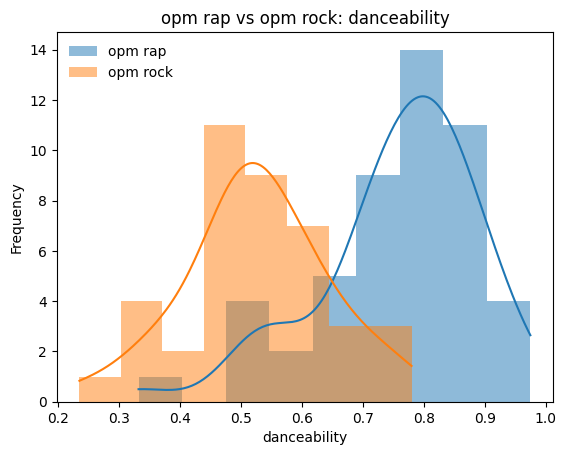

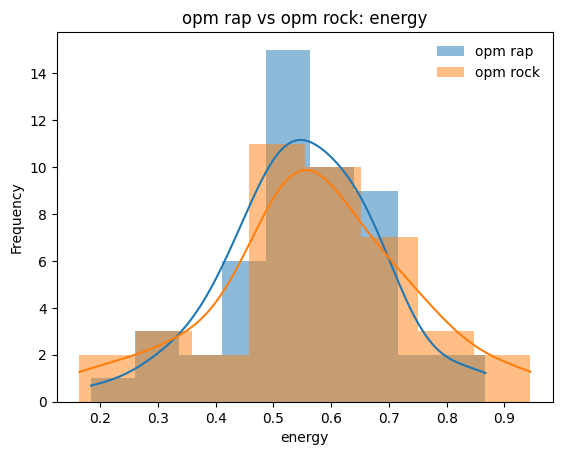

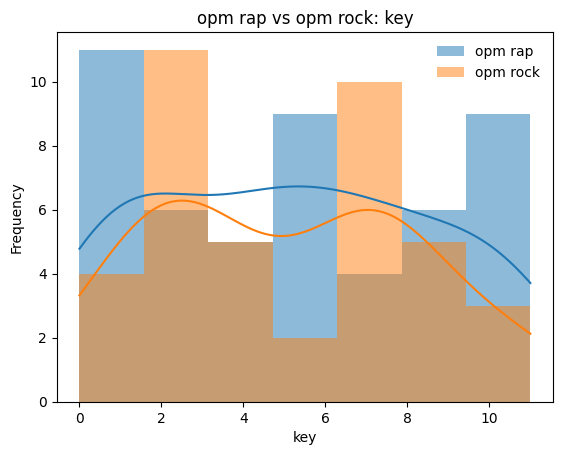

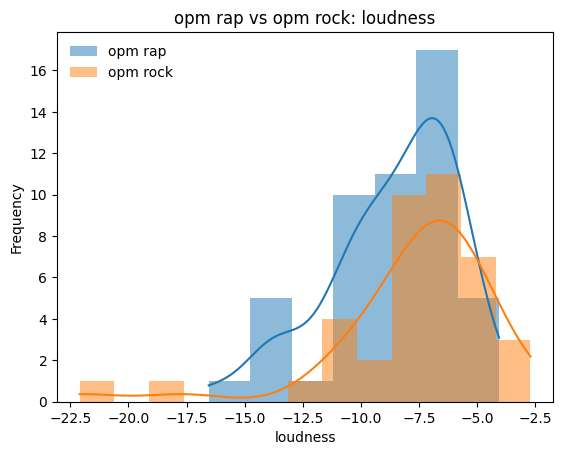

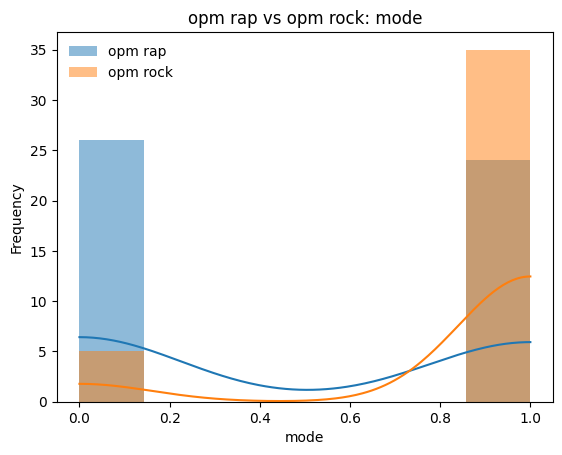

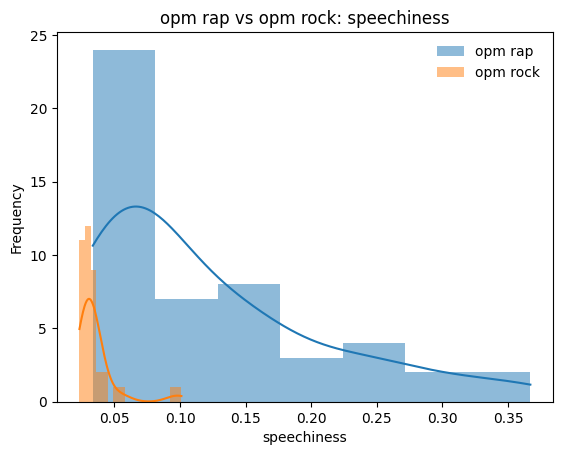

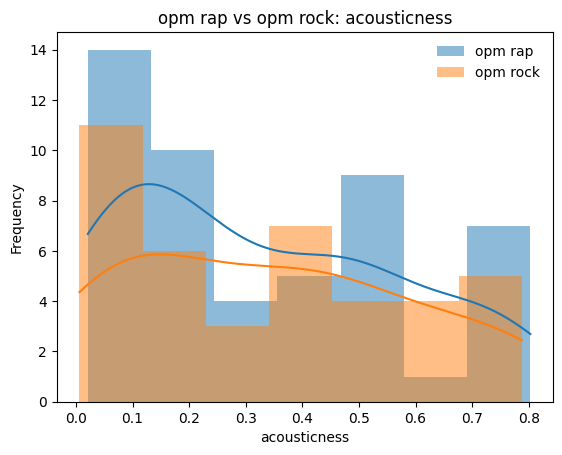

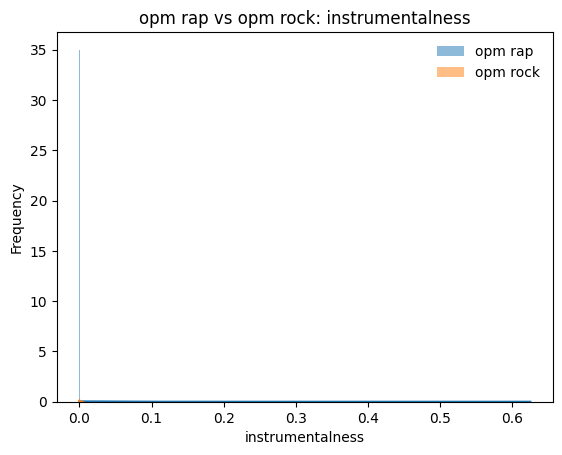

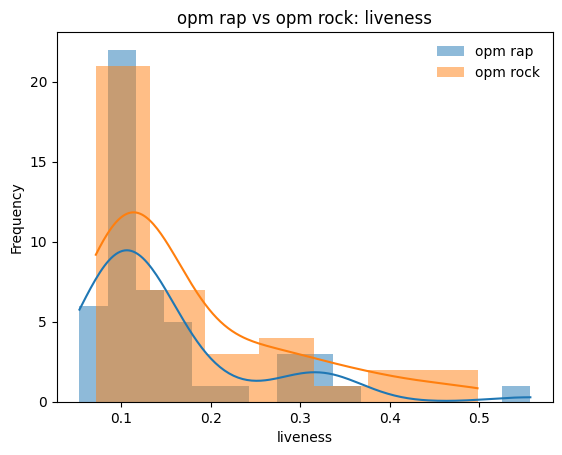

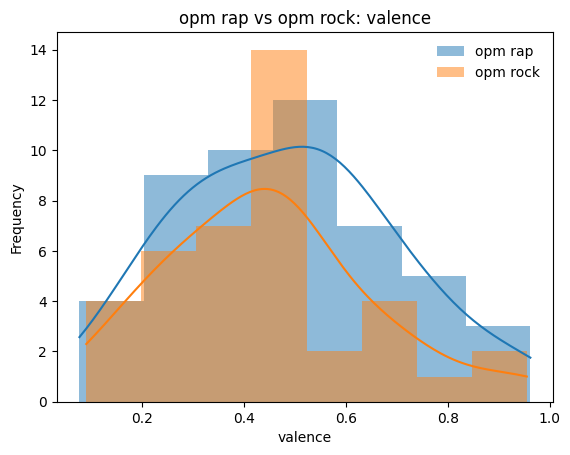

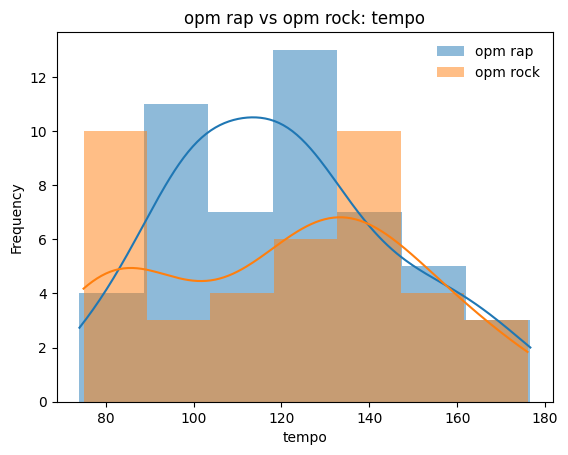

In [ ]:
for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig,ax = plt.subplots()
    for genre in compare_genres:
       data = tracks_df[tracks_df['genre']==genre]
       sns.histplot(data[col], ax=ax, label= genre, kde=True, edgecolor='None')
    plt.title(f"{compare_genres[0]} vs {compare_genres[1]}: {col}")
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

###############################################

Explanation here

###############################################

## 3. Feature Engineering

**Categorical Encoding**
Since supervised models only takes in integers as labels, we map genres to numbers

In [ ]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df.head()

track_id                          track_name  \
0  69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby   
1  0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here   
2  3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club   
3  08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight   
4  3vGkyQlCw8LklNip0ZUELC                              Nobela   

                artist_id      artist_name                album_id  duration  \
0  1EUmQM6xgUQLUkJVcvSdey  Orange & Lemons  1Pjond44g3GY0emy3LfcCl    261866   
1  6l880dxsvN2x5wiceaG6D0      Rico Blanco  5JqdmuqnCCp3ENI3IgdqDG    304000   
2  1WUdtysXvz9qXuD6toSJqA         Chicosci  08hYjHbXeduUko4iADsLOO    182706   
3  6Ww3OMFzCaO33ulKh1LBFN             Hale  3rYydzqOp83YUYh4EXjrbk    291320   
4  70ljCILl0aVXitf3K39YvT    Join The Club  7kzETZloUVbyQLuqDnLPVV    291506   

  release_date  popularity  danceability  energy  ...  acousticness  \
0   2005-03-24          74         0.555   0.674  ...       0.11600   
1   2023-10-13          54         0.510   0.538  ...       0.09160   
2   2023-10-18          45         0.361   0.778  ...       0.00605   
3         2005          73         0.556   0.563  ...       0.51100   
4   2016-04-01          69         0.358   0.548  ...       0.36000   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.000002    0.2560    0.395  146.381       261867   
1          0.000021    0.0973    0.462   74.967       304000   
2          0.000000    0.3810    0.505   95.303       182707   
3          0.000000    0.1190    0.238  134.259       291320   
4          0.000000    0.1730    0.518  163.434       291507   

              playlist_id  playlist_name     genre  genre_id  
0  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2  
1  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2  
2  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2  
3  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2  
4  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2  

[5 rows x 24 columns]

Build dictionary of label ids for later

In [ ]:
genre_lookup = tracks_df[['genre_id','genre']].drop_duplicates()\
                        .sort_values('genre_id')\
                        .set_index('genre_id')\
                        .to_dict()['genre']
genre_lookup

{0: 'opm p-pop', 1: 'opm rap', 2: 'opm rock', 3: 'opm senti'}

Select audio features to use for the model

In [ ]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

211 211


Add to matrices

In [ ]:
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

Split to train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4. Train Models

### 4.1. k-Nearest Neighbors (kNN)

Perform KNN using `K = [2, 50]` and validate using k-fold cross validation `k = 5`

In [ ]:
# Set parameter values
n_neighbors = np.arange(2,51)
k = 5 # for kfold

In [ ]:
# Set scaler
scaler = MinMaxScaler()   # RobustScaler would also work

# Initialize model
model = KNeighborsClassifier()

# Initialize cross validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize pipeline
pipeline = Pipeline([("scaler", scaler),("knn", model)])

Initialize parameter grid

In [ ]:
# Initialize parameters
param_grid = {'knn__n_neighbors': n_neighbors}

Find optimal parameters

In [ ]:
model_grid_search = GridSearchCV(pipeline, param_grid, verbose = 1, cv = cv)
model_grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=1)

In [ ]:
model_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=1)

Get best params and scores

In [ ]:
print(f"Best hyperparameters: {model_grid_search.best_params_}")
print(f"Train best score: {model_grid_search.best_score_:0.6}")
print(f"Train best score std: {np.std(model_grid_search.cv_results_['mean_test_score']):0.6}")

Best hyperparameters: {'knn__n_neighbors': 8}
Train best score: 0.642602
Train best score std: 0.0348387


View test score

In [ ]:
test_score = model_grid_search.score(X_test, y_test)
print(f"Test best score: {test_score:0.6}")

Test best score: 0.55814


Select best KNN model

In [ ]:
knn_model_pipeline = model_grid_search.best_estimator_
knn_model_pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=8))])

### 4.2. Support Vector Machine (SVM)

Perform SVM using 3 kernels [`linear`,`polynomial`,`radial`], for a range of regularization parameters `[0.1, 1, 10, 100, 1000]`, and validate using k-fold cross validation `k = 5`

In [ ]:
# Set scaler
scaler = MinMaxScaler()   # RobustScaler would also work

# Initialize model
model = SVC()

# Initialize cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize pipeline
pipeline = Pipeline ([("scaler", scaler),("svc", model)])

#### 4.2.1. SVM - Linear Kernel

Initialize parameter grid

In [ ]:
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__kernel': ['linear']}

Find optimal parameters

In [ ]:
model_grid_search_svc_linear = GridSearchCV(pipeline, param_grid, verbose = 1, cv = cv)
model_grid_search_svc_linear.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__kernel': ['linear']},
             verbose=1)

Get best params and scores

In [ ]:
print(f"Best hyperparameters: {model_grid_search_svc_linear.best_params_}")
print(f"Train best score: {model_grid_search_svc_linear.best_score_:0.6}")
print(f"Train best score std: {np.std(model_grid_search_svc_linear.cv_results_['mean_test_score']):0.6}")

Best hyperparameters: {'svc__C': 10, 'svc__kernel': 'linear'}
Train best score: 0.689483
Train best score std: 0.116359


View test score

In [ ]:
test_score = model_grid_search_svc_linear.score(X_test, y_test)
print(f"Test best score: {test_score:0.6}")

Test best score: 0.627907


#### 4.2.2. SVM - Polynomial Kernel

Initialize parameter grid

In [ ]:
param_grid = {'svc__C': [0.1, 1, 10, 100],
              'svc__gamma': [1, 0.1, 0.01, 0.001],
              'svc__degree': np.arange(2,5),
              'svc__kernel': ['poly']}

Find optimal parameters

In [ ]:
# test different n_jobs values
model_grid_search_svc_poly = GridSearchCV(pipeline, param_grid, verbose = 1, cv = cv)
model_grid_search_svc_poly.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__degree': array([2, 3, 4]),
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['poly']},
             verbose=1)

Get best params and scores

In [ ]:
print(f"Best hyperparameters: {model_grid_search_svc_poly.best_params_}")
print(f"Train best score: {model_grid_search_svc_poly.best_score_:0.6}")
print(f"Train best score std: {np.std(model_grid_search_svc_poly.cv_results_['mean_test_score']):0.6}")

Best hyperparameters: {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 1, 'svc__kernel': 'poly'}
Train best score: 0.660428
Train best score std: 0.103616


View test score

In [ ]:
test_score = model_grid_search_svc_poly.score(X_test, y_test)
print(f"Test best score: {test_score:0.6}")

Test best score: 0.627907


#### 4.2.3. SVM - Radial Kernel

In [ ]:
# Initialize parameters
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']}

Find optimal parameters

In [ ]:
model_grid_search_svc_rad = GridSearchCV(pipeline, param_grid, verbose = 1, cv = cv)
model_grid_search_svc_rad.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf']},
             verbose=1)

Get best params and scores

In [ ]:
print(f"Best hyperparameters: {model_grid_search_svc_rad.best_params_}")
print(f"Train best score: {model_grid_search_svc_rad.best_score_:0.6}")
print(f"Train best score std: {np.std(model_grid_search_svc_rad.cv_results_['mean_test_score']):0.6}")

Best hyperparameters: {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Train best score: 0.701426
Train best score std: 0.118984


View test score

In [ ]:
test_score = model_grid_search_svc_rad.score(X_test, y_test)
print(f"Test best score: {test_score:0.6}")

Test best score: 0.627907


Select best SVM model

In [ ]:
svc_model_pipeline = model_grid_search_svc_poly.best_estimator_
svc_model_pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(C=1, degree=2, gamma=1, kernel='poly'))])

### 4.3. Random Forest (RF)

Perform Random Forest and validate using k-fold cross validation k = 5

In [ ]:
# Set parameter values
k = 5 # for kfold

In [ ]:
# Set scaler
scaler = MinMaxScaler()   # RobustScaler would also work

# Initialize model
model = RandomForestClassifier()

# Initialize pipeline
pipeline = Pipeline ([("scaler", scaler),("rfc", model)])

# Initialize cross validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)

Initialize parameter grid

In [ ]:
param_grid = {
    'rfc__n_estimators': [50, 100, 200, 500],
    'rfc__max_depth' : [None, 5, 10, 15, 20],
}

Find optimal parameters

In [ ]:
model_grid_search = GridSearchCV(pipeline, param_grid, verbose = 1, cv = cv)
model_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [None, 5, 10, 15, 20],
                         'rfc__n_estimators': [50, 100, 200, 500]},
             verbose=1)

Get best params and scores

In [ ]:
print(f"Best hyperparameters: {model_grid_search.best_params_}")
print(f"Train best score: {model_grid_search.best_score_:0.6}")
print(f"Train best score std: {np.std(model_grid_search.cv_results_['mean_test_score']):0.6}")

Best hyperparameters: {'rfc__max_depth': 10, 'rfc__n_estimators': 200}
Train best score: 0.690018
Train best score std: 0.0118356


View test score

In [ ]:
test_score = model_grid_search.score(X_test, y_test)
print(f"Test best score: {test_score:0.6}")

Test best score: 0.767442


Visualize final tree

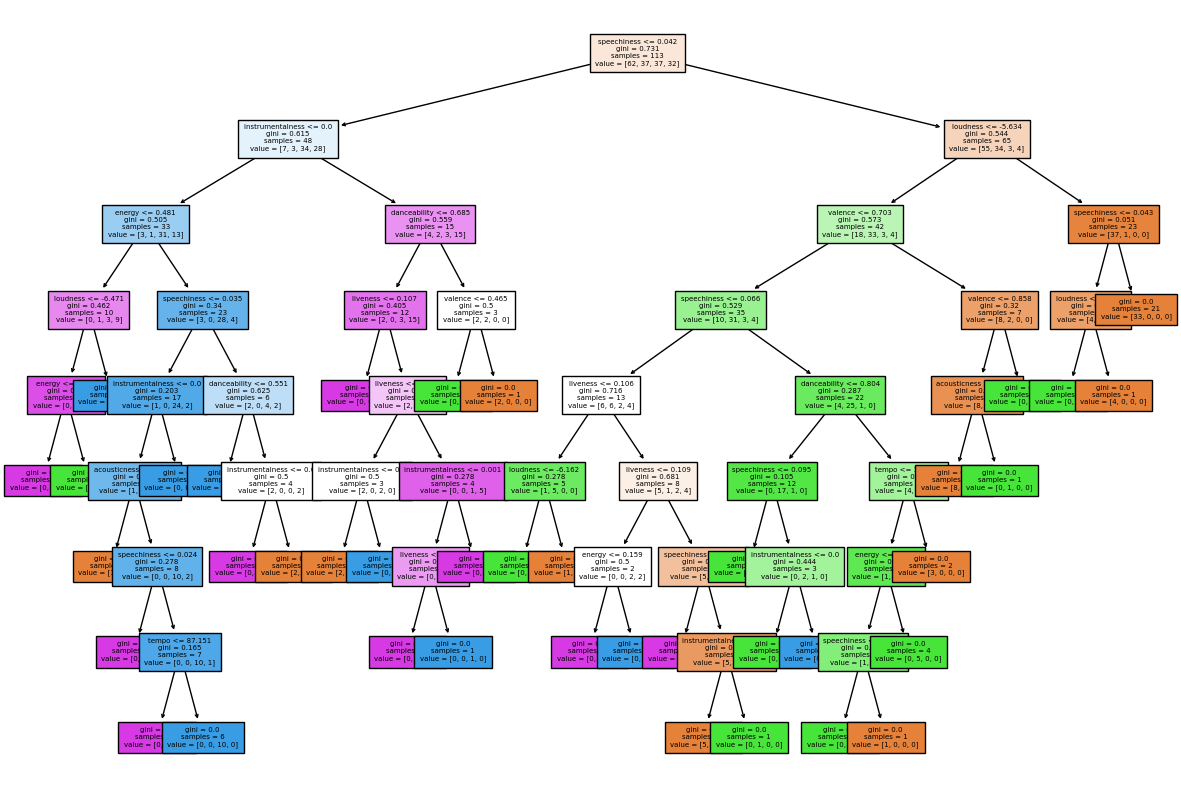

In [ ]:
best_params = {k.split('__')[1]:v for k,v in model_grid_search.best_params_.items()}
rfc_best = RandomForestClassifier(random_state=42, **best_params)
rfc_best.fit(X_train, y_train)

# plot
plt.figure(figsize=(12,8))
plot_tree(rfc_best.estimators_[0],feature_names=X_train.columns, filled=True, fontsize=5)
plt.tight_layout()


Select best RF model

In [ ]:
rfc_model_pipeline = model_grid_search.best_estimator_
rfc_model_pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

## 5. Select Best Model

Generate genre predictions per best model

In [ ]:
knn_y_pred = knn_model_pipeline.fit(X_train, y_train).predict(X_test)
svc_y_pred = svc_model_pipeline.fit(X_train, y_train).predict(X_test)
rfc_y_pred = rfc_model_pipeline.fit(X_train, y_train).predict(X_test)

Generate classification report per best model

In [ ]:
model_names = ['KNN','SVM','RF']
for i,y_pred in enumerate([knn_y_pred, svc_y_pred, rfc_y_pred]):
    print('-------------------------------------------------------------')
    print(model_names[i])
    print(classification_report(y_test,y_pred,\
                                target_names=genre_lookup.values()))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

   opm p-pop       0.62      0.76      0.68        17
     opm rap       0.67      0.55      0.60        11
    opm rock       0.30      0.50      0.37         6
   opm senti       0.67      0.22      0.33         9

    accuracy                           0.56        43
   macro avg       0.56      0.51      0.50        43
weighted avg       0.60      0.56      0.55        43

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

   opm p-pop       0.65      0.76      0.70        17
     opm rap       0.88      0.64      0.74        11
    opm rock       0.33      0.50      0.40         6
   opm senti       0.67      0.44      0.53         9

    accuracy                           0.63        43
   macro avg       0.63      0.59      0.59        43
weighted avg       0.67      0.63      0.63        43

- accuracy = % correct genre classifications
        all correct / all
- precision =  % correct genre classifications given everything model classified as that genre, emphasizes false positives
        TP/TP+FP
- recall = % correct genre classifications given all actual tracks in the genre, emphasizes false negatives
        TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot confusion matrices

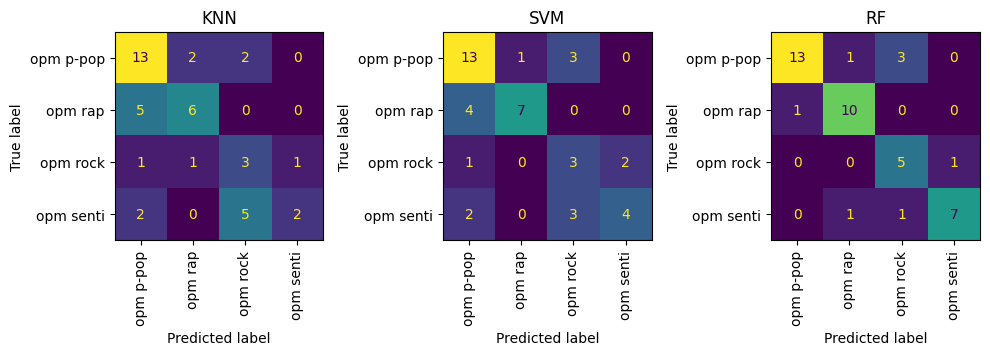

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(10,5))
model_names = ['KNN','SVM','RF']
for i,y_pred in enumerate([knn_y_pred, svc_y_pred, rfc_y_pred]):
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
    cmd.plot(ax=axs[i], xticks_rotation=90, colorbar=False)
    axs[i].set_title(model_names[i])
plt.tight_layout()


>Q: Which model performed best?

Store best model

In [ ]:
best_model_pipeline = rfc_model_pipeline

In [ ]:
best_model = best_model_pipeline.named_steps['rfc']
best_model_scaler = best_model_pipeline.named_steps['scaler']

Add predictions as columns to `tracks_df`

In [ ]:
tracks_df['predicted_genre_id'] = best_model_pipeline.predict(tracks_df[feature_cols])
tracks_df['predicted_genre'] = tracks_df['predicted_genre_id'].map(genre_lookup)
tracks_df

track_id                          track_name  \
0   69u8qQcaA3o0A7Ko87juqp  Hanggang Kailan - Umuwi Ka Na Baby   
1   0IuKNTVgn9vapnGU44natX                 You'll Be Safe Here   
2   3a3AE8ij1HdMEAOazWuUHQ        Chicosci Vampire Social Club   
3   08hFNg8Oz3lvaAms7qrIif          The Day You Said Goodnight   
4   3vGkyQlCw8LklNip0ZUELC                              Nobela   
..                     ...                                 ...   
34  1pi3VCMlGVaXvrjlVOkBPN                               KLWKN   
36  6t4CmQGucLORsKZF4M6NNC                    Make It With You   
37  0vDzg5rADviX5YizHGo6UU                           Kursunada   
38  143x7pgmHXYdHhTJUoeoma    Kumpas (from “2 Good 2 Be True”)   
39  0PQ84nbR1Owkr7RtGBmZI7                             Crazier   

                 artist_id       artist_name                album_id  \
0   1EUmQM6xgUQLUkJVcvSdey   Orange & Lemons  1Pjond44g3GY0emy3LfcCl   
1   6l880dxsvN2x5wiceaG6D0       Rico Blanco  5JqdmuqnCCp3ENI3IgdqDG   
2   1WUdtysXvz9qXuD6toSJqA          Chicosci  08hYjHbXeduUko4iADsLOO   
3   6Ww3OMFzCaO33ulKh1LBFN              Hale  3rYydzqOp83YUYh4EXjrbk   
4   70ljCILl0aVXitf3K39YvT     Join The Club  7kzETZloUVbyQLuqDnLPVV   
..                     ...               ...                     ...   
34  52gTrzyF0DyfkFl1DQz9Oq        Music Hero  1TmGJJPRkYoxPEAo0xFnQV   
36  4DAcJXcjX0zlQAZAPAx4Zb           Ben&Ben  2EdiYNKRhGH5dbm93PpA4p   
37  1DlYnIiliftt6R21Y5NOW2              Adie  3UtNIGkQvgd4V5qJxQrebA   
38  0rZRTXEmmPmx6gt92tBqIc  Moira Dela Torre  3Y5UOySXapMRA2Krxq8r3S   
39  2Ev7vtPI38BE2kQvwmH4ce     Arthur Miguel  1RKdiat44rgOshOsNdgSXf   

    duration release_date  popularity  danceability  energy  ...  liveness  \
0     261866   2005-03-24          74         0.555   0.674  ...    0.2560   
1     304000   2023-10-13          54         0.510   0.538  ...    0.0973   
2     182706   2023-10-18          45         0.361   0.778  ...    0.3810   
3     291320         2005          73         0.556   0.563  ...    0.1190   
4     291506   2016-04-01          69         0.358   0.548  ...    0.1730   
..       ...          ...         ...           ...     ...  ...       ...   
34    256571   2019-02-02          67         0.493   0.394  ...    0.2670   
36    209782   2019-12-13          67         0.555   0.457  ...    0.1720   
37    179117   2023-07-28          67         0.565   0.519  ...    0.2740   
38    268065   2022-05-13          66         0.552   0.279  ...    0.0945   
39    233339   2021-07-01          65         0.603   0.152  ...    0.0844   

    valence    tempo  duration_ms             playlist_id     playlist_name  \
0     0.395  146.381       261867  37i9dQZF1DWYDQ8wBxd7xt     OPM Rock Hits   
1     0.462   74.967       304000  37i9dQZF1DWYDQ8wBxd7xt     OPM Rock Hits   
2     0.505   95.303       182707  37i9dQZF1DWYDQ8wBxd7xt     OPM Rock Hits   
3     0.238  134.259       291320  37i9dQZF1DWYDQ8wBxd7xt     OPM Rock Hits   
4     0.518  163.434       291507  37i9dQZF1DWYDQ8wBxd7xt     OPM Rock Hits   
..      ...      ...          ...                     ...               ...   
34    0.375  152.030       256573  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   
36    0.345   86.630       209783  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   
37    0.380  170.048       179118  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   
38    0.369  124.080       268066  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   
39    0.314   83.239       233340  37i9dQZF1DX7Jerj8LqApV  OPM Says Chillax   

        genre  genre_id  predicted_genre_id  predicted_genre  
0    opm rock         2                   2         opm rock  
1    opm rock         2                   2         opm rock  
2    opm rock         2                   2         opm rock  
3    opm rock         2                   2         opm rock  
4    opm rock         2                   2         opm rock  
..        ...       ...                 ...              ...  
34  opm senti         3          

## 6. Feature Importance

Use scaler from pipeline to transform

In [ ]:
features = best_model_scaler.transform(X_train)

Run SHAP explainer and get importance values

In [ ]:
explainer = shap.TreeExplainer(best_model,\
                            feature_names=feature_cols)
shap_values = explainer.shap_values(features)

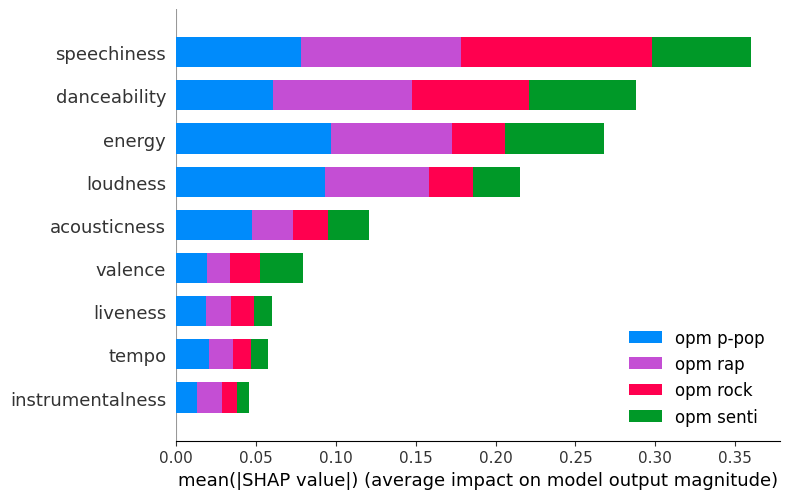

In [ ]:
shap.summary_plot(shap_values=shap_values,
                  features = features,
                  feature_names = feature_cols,
                  class_names = list(genre_lookup.values()),
                  plot_type = "bar")

>Q: Pick a track and verify as a listener if you agree with the predicted genre and how shap explains it

In [ ]:
# Get sample track and index, scale features
sample = tracks_df[tracks_df['track_name'].str.contains('Ligaya')]
sample_idx = sample.index.values[0]
sample_features = best_model_scaler.transform(sample[feature_cols])
sample

track_id track_name               artist_id  artist_name  \
37  6SHSvo6OGgpneKfsxFGhhk     Ligaya  7374lH6kwx9uQATYQ9H3Cp  Eraserheads   

                  album_id  duration release_date  popularity  danceability  \
37  2DIpgoeZAbwk3wF1qSDj8v    271466   2004-01-23          62         0.549   

    energy  ...  liveness  valence    tempo  duration_ms  \
37   0.718  ...     0.163    0.683  125.898       271467   

               playlist_id  playlist_name     genre  genre_id  \
37  37i9dQZF1DWYDQ8wBxd7xt  OPM Rock Hits  opm rock         2   

    predicted_genre_id  predicted_genre  
37                   2         opm rock  

[1 rows x 26 columns]

In [ ]:
# Plot force plot per genre
shap_values = explainer.shap_values(sample_features)
shap.initjs()
for genre_id in range(4):
    print(genre_lookup[genre_id])
    display(shap.force_plot(explainer.expected_value[genre_id], shap_values[genre_id], sample_features,\
                             feature_names=feature_cols))


opm p-pop


opm rap


opm rock


opm senti


## Save the pipeline

In [ ]:
joblib.dump(best_model_pipeline,'genre_classifierS3G3.pkl')

['genre_classifierS3G3.pkl']